>># Comprehensive Machine learning project using classical techniques and nueral networks

### The project is done by :
#### Dana Siyam 0204334
#### Roaa Abu-Juhasheh  0203952

># Brief description about the features that we will train the models on.

    UTC : To keep tarck of data a timestamp is added to every sensor reading.
    Temperature : Air Temperature.
    Humidity : Air Humidity.
    TVOC : Total Volatile Organic Compounds; measured in parts per billion. 
    eCO2 :co2 equivalent concentration; calculated from different values like TVCO.
    Raw H2 : raw molecular hydrogen; not compensated (Bias, temperature, etc.).
    Raw Ethanol : Raw ethanol gas.
    Pressure : Air Pressure.
    PM1.0: particulate matter size < 1.0 µm (PM1.0).1.0 µm < 2.5 µm (PM2.5).
    PM2.5 : particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5).
    NC0.5 : Number concentration of particulate matter.This differs from PM.
    NC1.0 : Number concentration of particulate matter.This differs from PM.
    NC2.5 : Number concentration of particulate matter.This differs from PM.
    CNT: Carbon Nanotubes (Sample counter).
    Fire Alarm : ground truth is "1" if a fire is there.


## Data Analysis

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import *
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping , ModelCheckpoint
import keras_tuner

>># Read the data from Csv file , Take a a look at the structure

In [2]:
file_name=r"C:\Users\DELL\Downloads\AI\smoke_detection_iot.csv"
smoke=pd.read_csv(file_name)
smoke.head()

index         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0      0  1654733331          20.000        57.36          0        400   
1      1  1654733332          20.015        56.67          0        400   
2      2  1654733333          20.029        55.96          0        400   
3      3  1654733334          20.044        55.28          0        400   
4      4  1654733335          20.059        54.69          0        400   

   Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0   12306        18520        939.735    0.0    0.0    0.0    0.0    0.0    0   
1   12345        18651        939.744    0.0    0.0    0.0    0.0    0.0    1   
2   12374        18764        939.738    0.0    0.0    0.0    0.0    0.0    2   
3   12390        18849        939.736    0.0    0.0    0.0    0.0    0.0    3   
4   12403        18921        939.744    0.0    0.0    0.0    0.0    0.0    4   

   Fire Alarm  
0           0  
1           0  
2           0  
3           0  
4           0

In [3]:
smoke.describe().T

count          mean            std           min  \
index           62630.0  3.131450e+04   18079.868017  0.000000e+00   
UTC             62630.0  1.654792e+09  110002.488078  1.654712e+09   
Temperature[C]  62630.0  1.597042e+01      14.359576 -2.201000e+01   
Humidity[%]     62630.0  4.853950e+01       8.865367  1.074000e+01   
TVOC[ppb]       62630.0  1.942058e+03    7811.589055  0.000000e+00   
eCO2[ppm]       62630.0  6.700210e+02    1905.885439  4.000000e+02   
Raw H2          62630.0  1.294245e+04     272.464305  1.066800e+04   
Raw Ethanol     62630.0  1.975426e+04     609.513156  1.531700e+04   
Pressure[hPa]   62630.0  9.386276e+02       1.331344  9.308520e+02   
PM1.0           62630.0  1.005943e+02     922.524245  0.000000e+00   
PM2.5           62630.0  1.844678e+02    1976.305615  0.000000e+00   
NC0.5           62630.0  4.914636e+02    4265.661251  0.000000e+00   
NC1.0           62630.0  2.035865e+02    2214.738556  0.000000e+00   
NC2.5           62630.0  8.004904e+01    1083.383189  0.000000e+00   
CNT             62630.0  1.051139e+04    7597.870997  0.000000e+00   
Fire Alarm      62630.0  7.146256e-01       0.451596  0.000000e+00   

                         25%           50%           75%           max  
index           1.565725e+04  3.131450e+04  4.697175e+04  6.262900e+04  
UTC             1.654743e+09  1.654762e+09  1.654778e+09  1.655130e+09  
Temperature[C]  1.099425e+01  2.013000e+01  2.540950e+01  5.993000e+01  
Humidity[%]     4.753000e+01  5.015000e+01  5.324000e+01  7.520000e+01  
TVOC[ppb]       1.300000e+02  9.810000e+02  1.189000e+03  6.000000e+04  
eCO2[ppm]       4.000000e+02  4.000000e+02  4.380000e+02  6.000000e+04  
Raw H2          1.283000e+04  1.292400e+04  1.310900e+04  1.380300e+04  
Raw Ethanol     1.943500e+04  1.950100e+04  2.007800e+04  2.141000e+04  
Pressure[hPa]   9.387000e+02  9.388160e+02  9.394180e+02  9.398610e+02  
PM1.0           1.280000e+00  1.810000e+00  2.090000e+00  1.433369e+04  
PM2.5           1.340000e+00  1.880000e+00  2.180000e+00  4.543226e+04  
NC0.5           8.820000e+00  1.245000e+01  1.442000e+01  6.148203e+04  
NC1.0           1.384000e+00  1.943000e+00  2.249000e+00  5.191468e+04  
NC2.5           3.300000e-02  4.400000e-02  5.100000e-02  3.002644e+04  
CNT             3.625250e+03  9.336000e+03  1.716475e+04  2.499300e+04  
Fire Alarm      0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00

>>## The data contains 16 features , 1 target (label) with a 62630 sample

In [4]:
smoke.info()
smoke.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


(62630, 16)

>>## We can clearly see that there is no missing values in the features

In [5]:
smoke.isnull().sum()

index             0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [6]:
smoke['NC0.5'].value_counts()

NC0.5
0.00        182
13.17       118
12.77       116
12.07       114
12.29       114
           ... 
14856.56      1
14484.17      1
12337.75      1
9696.26       1
30817.29      1
Name: count, Length: 3093, dtype: int64

>> ## Here we droped the first column which is the index column because we don't need it

In [7]:
smoke=smoke.drop("index",axis=1)

>>## A scatter matrix that shows the relations between all numerical features 

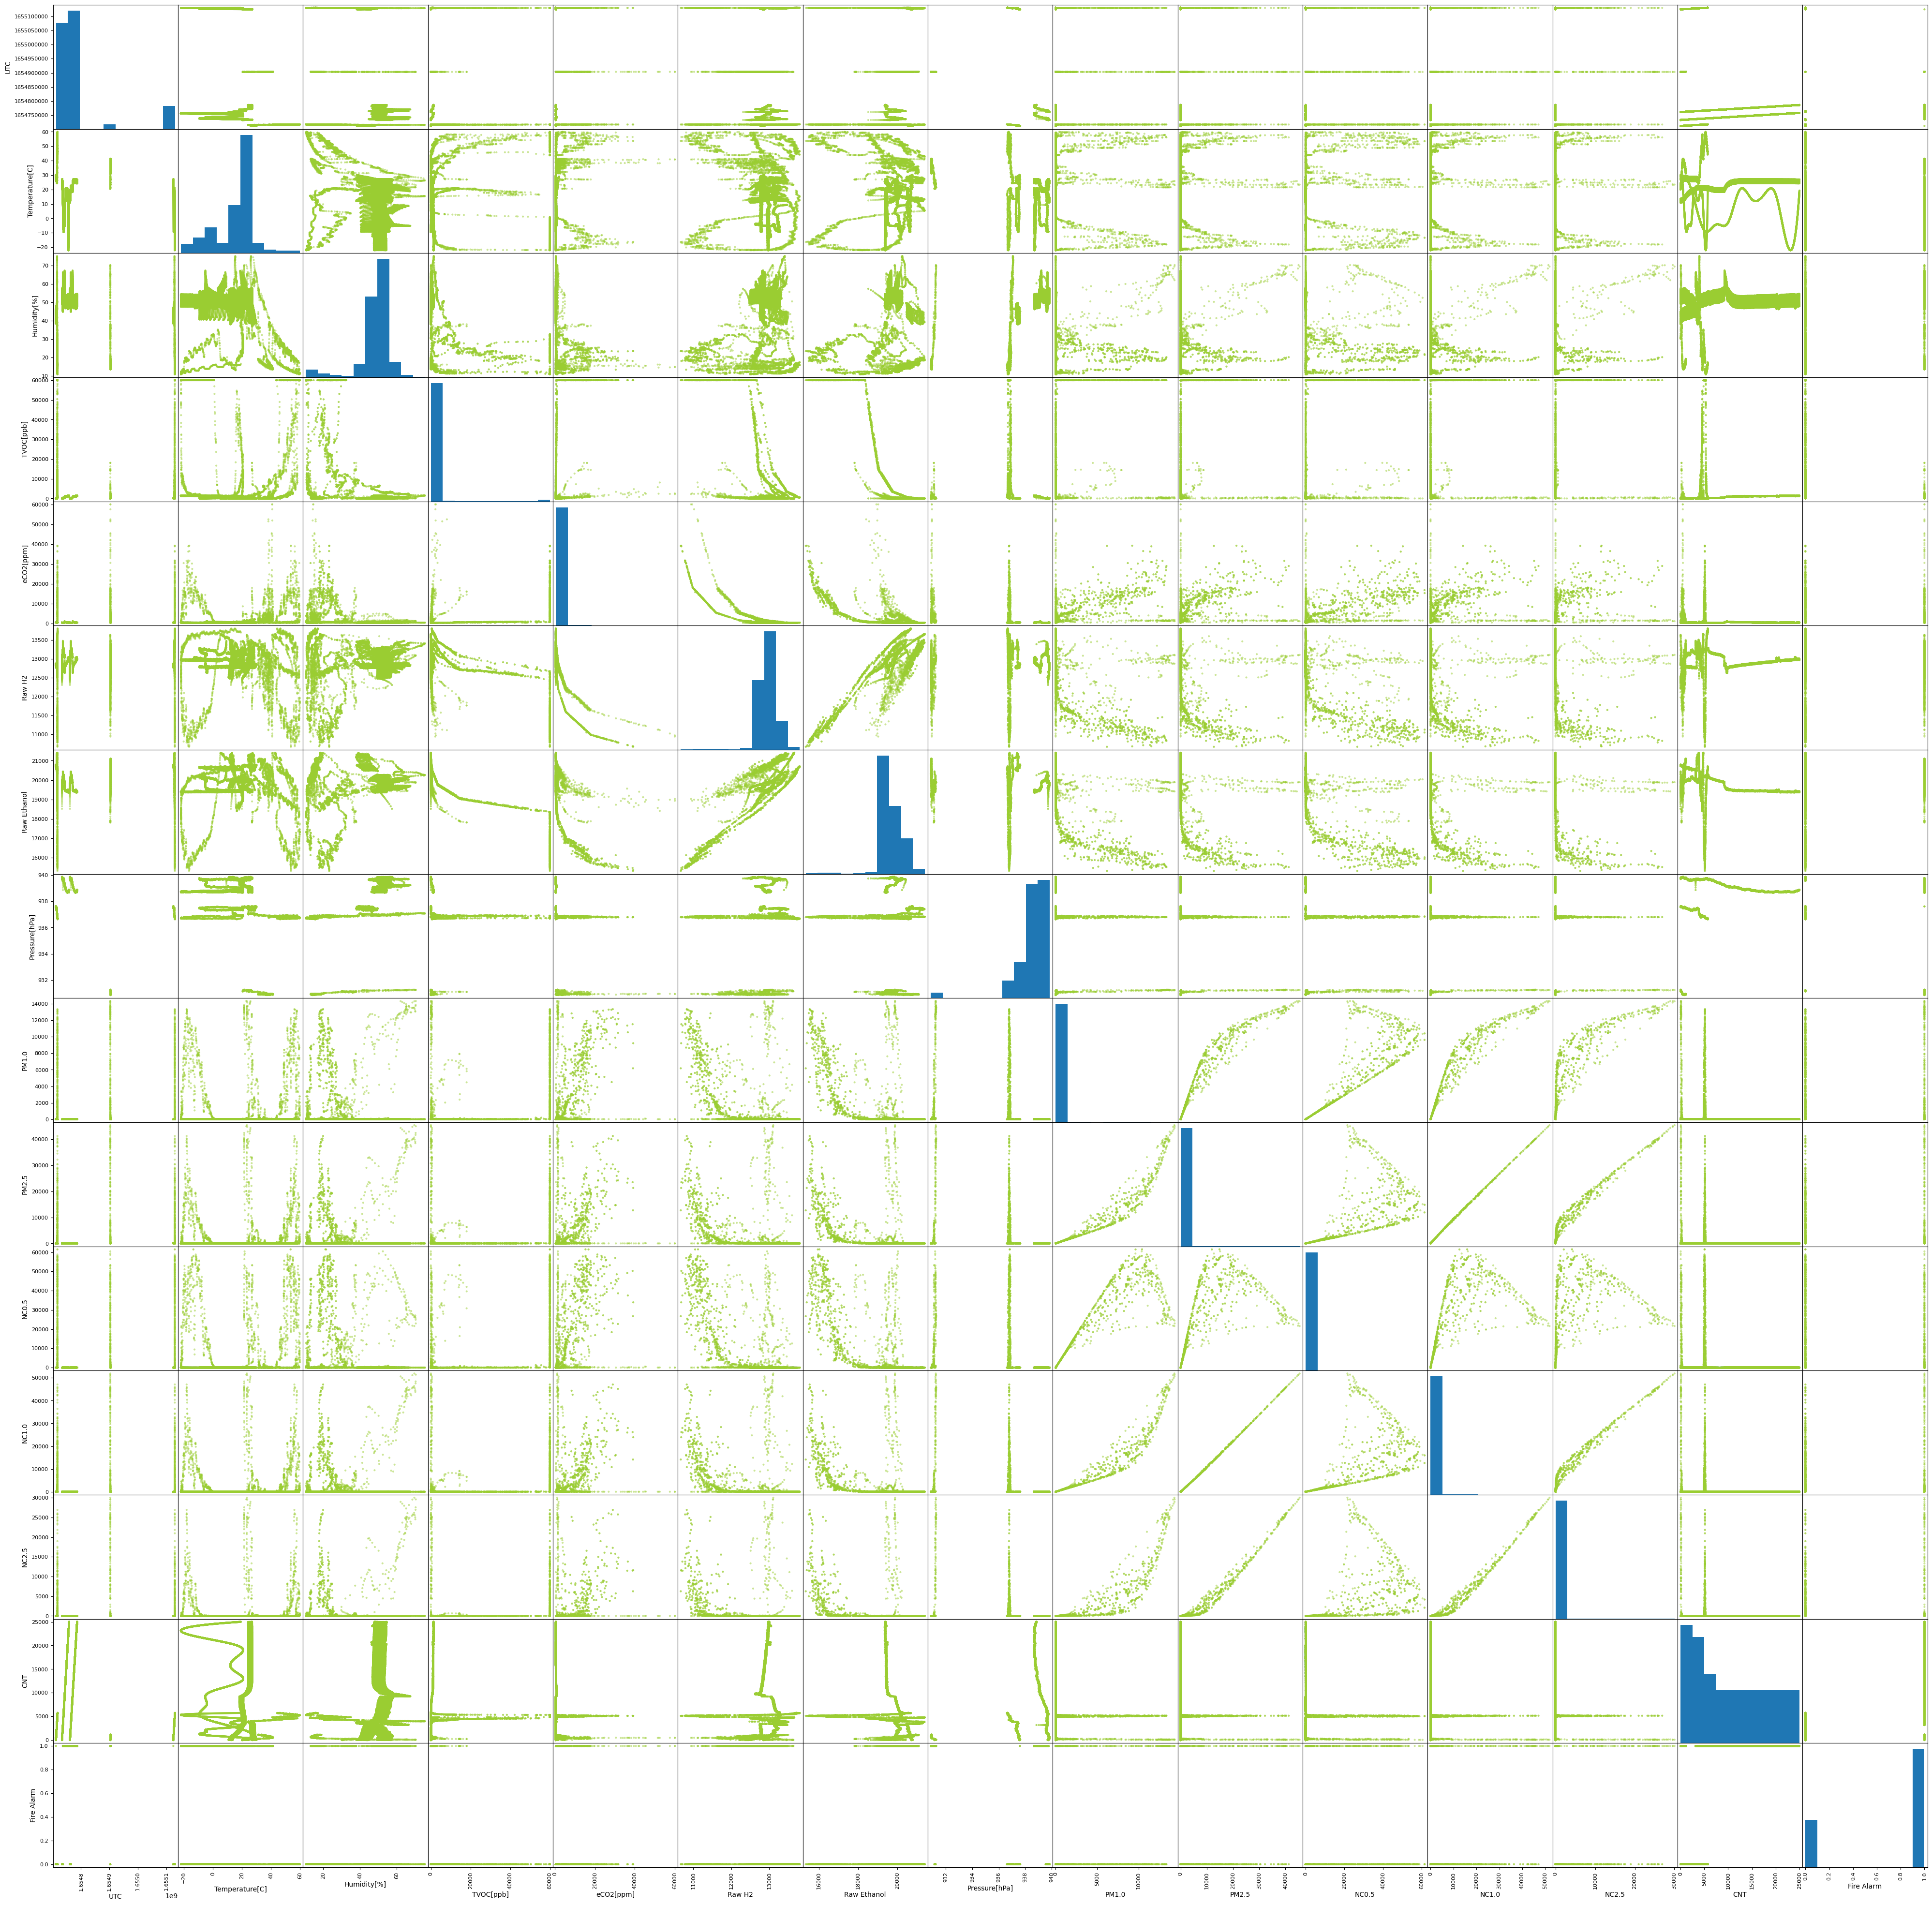

In [8]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
smoke_columns=[smoke.columns[0],smoke.columns[1],smoke.columns[2],smoke.columns[3],smoke.columns[4],smoke.columns[5],smoke.columns[6],smoke.columns[7],smoke.columns[8],smoke.columns[9],smoke.columns[10],smoke.columns[11],smoke.columns[12],smoke.columns[13],smoke.columns[14]]
scatter_matrix(smoke[smoke_columns], figsize=(50, 50),color='yellowgreen')
plt.show()

>>### The pie plot below shows the Fire Alarm Distribution which is the target .
        >>#### 71.5% when there is a fire .
        >>#### 28.5% when there is no fire .

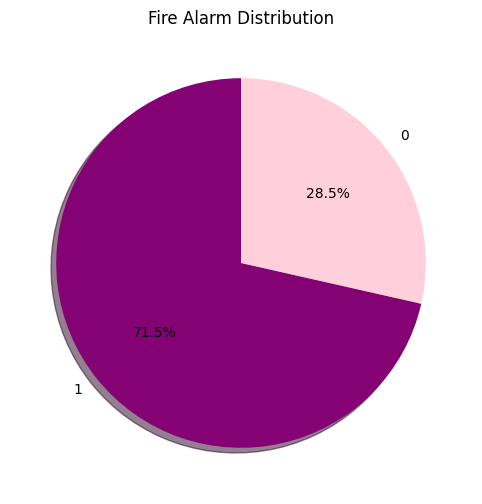

In [9]:
plt.figure(figsize=(8, 6))  # Set the figure size (width, height)
plt.pie(smoke['Fire Alarm'].value_counts(), labels=smoke["Fire Alarm"].value_counts().index, autopct="%1.1f%%", startangle=90,shadow=True,colors=['#840273','#ffcfdc'])
plt.title("Fire Alarm Distribution")
plt.show()

>>### This code shows a histogram thet describes the Distribution of Humidity , we can see that the Humidity has the highest values between almost 45-55 

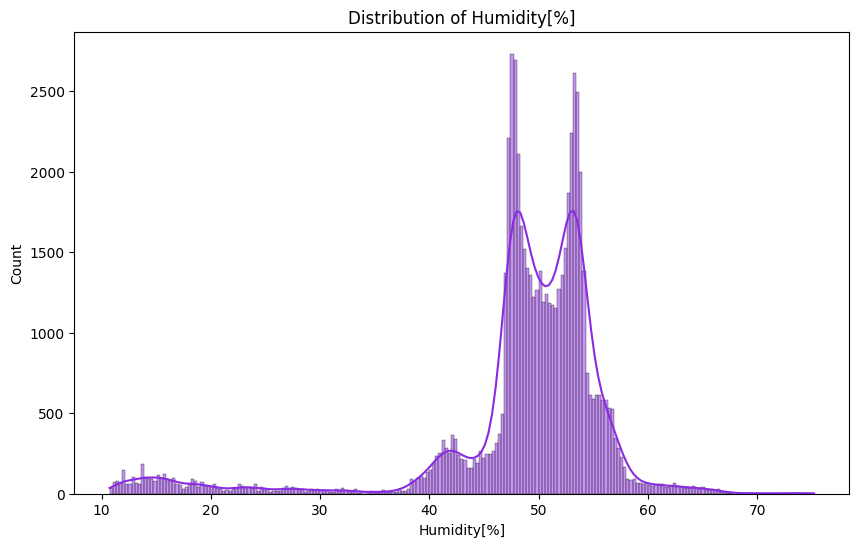

In [10]:
plt.figure(figsize=(10 ,6))
sns.histplot(data=smoke, x="Humidity[%]", kde=True,color='blueviolet')
plt.title("Distribution of Humidity[%]")
plt.xlabel("Humidity[%]")
plt.ylabel("Count")
plt.show()

>>### This correlation matrix shows the relations between the features : Fire Alarm , CNT , Humidity , Pressure , Temperature.

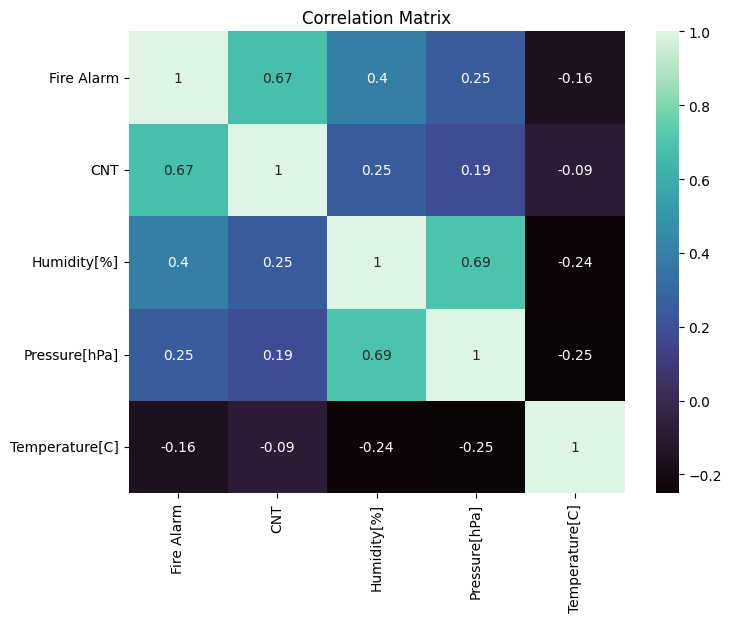

In [11]:
numerical_vars = ["Fire Alarm", "CNT", "Humidity[%]","Pressure[hPa]","Temperature[C]"]
correlation_matrix = smoke[numerical_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,cmap='mako')
plt.title("Correlation Matrix")
plt.show()

>>### This box plot describes the Distribution of Raw H2 , Raw H2 Concentration is nearly between 12400-13500 
* Other than that is considered as outlier

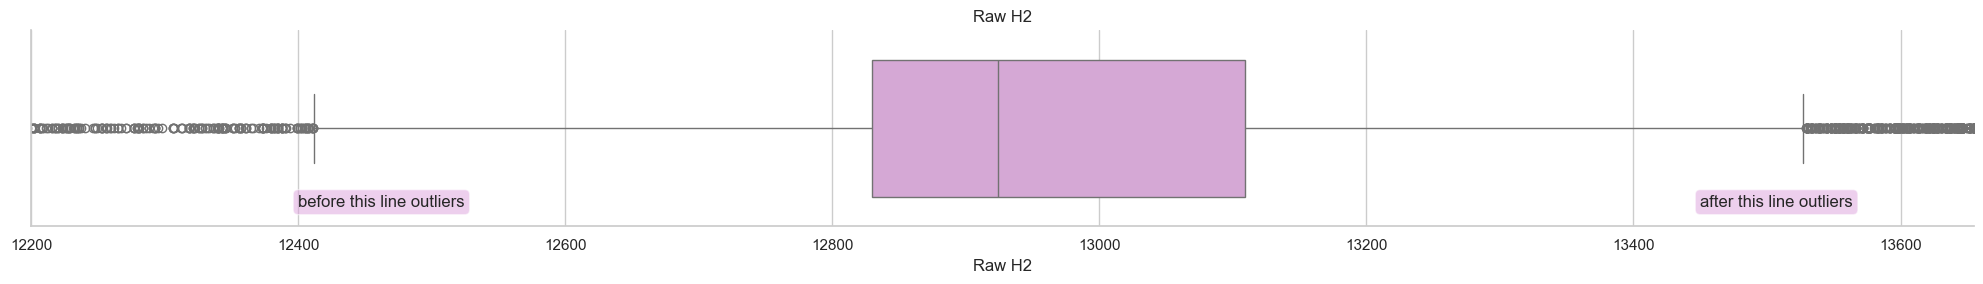

In [12]:
sns.set(style='whitegrid')
fig, ax=plt.subplots(figsize=(20,3))
sns.boxplot(smoke["Raw H2"],orient='h',color="plum",width=0.7)
plt.title("Raw H2")
sns.despine()
plt.xlim([12200,13655])
props=dict(boxstyle='round',facecolor="plum",alpha=0.5)
ax.text(12400,0.4,"before this line outliers",bbox=props)
ax.text(13450,0.4,"after this line outliers",bbox=props)
plt.tight_layout()
plt.show()

>>### This scatter plot shows the relation between Raw Ethanol and NC0.5 , and we use the target as the size and temperature as the color

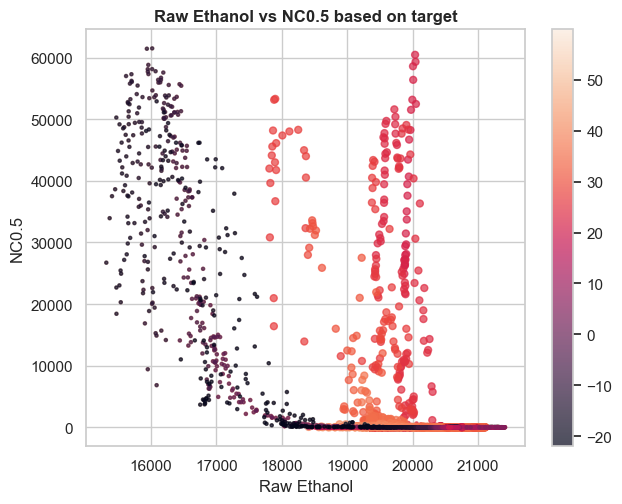

In [13]:
a=smoke[['Raw Ethanol','Temperature[C]','NC0.5','Fire Alarm']]
c=list(a['Raw Ethanol'])
t=list(a['NC0.5'])
colors=a['Temperature[C]']
#size=a['Raw Ethanol']/1000
size=20*a["Fire Alarm"] +5
plt.scatter(c,t,c=colors,s=size, alpha=0.7)
plt.tight_layout()
plt.xlabel('Raw Ethanol')
plt.ylabel('NC0.5')
plt.title("Raw Ethanol vs NC0.5 based on target",fontweight='bold')
plt.colorbar()
plt.show()

>># Looking for correlations between the label and the other features

In [14]:
corr_matrix=smoke.corr()
print(corr_matrix['Fire Alarm'].sort_values(ascending=False))

Fire Alarm        1.000000
CNT               0.673762
Humidity[%]       0.399846
Pressure[hPa]     0.249797
Raw H2            0.107007
NC2.5            -0.057707
NC1.0            -0.082828
PM2.5            -0.084916
eCO2[ppm]        -0.097006
PM1.0            -0.110552
NC0.5            -0.128118
Temperature[C]   -0.163902
TVOC[ppb]        -0.214743
Raw Ethanol      -0.340652
UTC              -0.389404
Name: Fire Alarm, dtype: float64


### Clearly , you can see that correlation equals 1 with the feature itself and it is close to 1 when it's proportional with Traffic Situation.
### While it's close to 0 they are independet , and when it's negative it will be inversely proportional with Traffic Situation.

># The next step is preparing the data for training 

>>## Here we used the Fire Alarm as the target (label) 

In [15]:
smoke_label=smoke['Fire Alarm'].copy()
smoke_without=smoke.drop("Fire Alarm",axis=1)
smoke_without.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 6.7 MB


># Data is scaled in this step , prepared and converted to a DataFrame 
* dealing with DataFrames is more flexable

In [16]:
full_pipline = Pipeline([('std_scaler',StandardScaler())])
smoke_prepared=full_pipline.fit_transform(smoke_without)
smoke_prepared=pd.DataFrame(smoke_prepared,columns=full_pipline.get_feature_names_out())
smoke_prepared.describe().T

count          mean       std       min       25%       50%  \
UTC             62630.0 -4.850832e-13  1.000008 -0.726164 -0.443829 -0.274057   
Temperature[C]  62630.0 -5.808684e-17  1.000008 -2.644975 -0.346543  0.289675   
Humidity[%]     62630.0 -2.613908e-16  1.000008 -4.263760 -0.113871  0.181663   
TVOC[ppb]       62630.0  0.000000e+00  1.000008 -0.248614 -0.231972 -0.123031   
eCO2[ppm]       62630.0  1.815214e-17  1.000008 -0.141679 -0.141679 -0.141679   
Raw H2          62630.0 -3.412602e-16  1.000008 -8.347780 -0.412732 -0.067730   
Raw Ethanol     62630.0  1.568345e-15  1.000008 -7.280062 -0.523796 -0.415512   
Pressure[hPa]   62630.0 -6.630613e-14  1.000008 -5.840500  0.054344  0.141475   
PM1.0           62630.0  3.630428e-18  1.000008 -0.109043 -0.107656 -0.107081   
PM2.5           62630.0  0.000000e+00  1.000008 -0.093340 -0.092662 -0.092389   
NC0.5           62630.0  7.260855e-18  1.000008 -0.115215 -0.113147 -0.112296   
NC1.0           62630.0  1.452171e-17  1.000008 -0.091924 -0.091299 -0.091047   
NC2.5           62630.0  0.000000e+00  1.000008 -0.073889 -0.073858 -0.073848   
CNT             62630.0 -7.260855e-17  1.000008 -1.383476 -0.906332 -0.154701   

                     75%        max  
UTC            -0.131720   3.072544  
Temperature[C]  0.657342   3.061367  
Humidity[%]     0.530214   3.007288  
TVOC[ppb]      -0.096403   7.432343  
eCO2[ppm]      -0.121740  31.130125  
Raw H2          0.611263   3.158406  
Raw Ethanol     0.531153   2.716521  
Pressure[hPa]   0.593654   0.926403  
PM1.0          -0.106778  15.428548  
PM2.5          -0.092237  22.895322  
NC0.5          -0.111834  14.298147  
NC1.0          -0.090909  23.348808  
NC2.5          -0.073842  27.641769  
CNT             0.875695   1.906025

In [17]:
smoke_prepared['Fire Alarm']=smoke_label

>>## Here we split the data into a train set and a test set using StratifiedShuffleSplit 

In [18]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(smoke_prepared, smoke_label):
    smoke_train_set_n = smoke_prepared.iloc[train_index]
    smoke_test_set_n = smoke_prepared.iloc[test_index]
    strat_splits.append([smoke_train_set_n, smoke_test_set_n])
smoke_train, smoke_test = strat_splits[0]
print(smoke_test.shape)
print(smoke_train.shape)
smoke_train_label=smoke_train['Fire Alarm'].copy()
smoke_train=smoke_train.drop('Fire Alarm',axis=1)
smoke_test_label=smoke_test['Fire Alarm'].copy()
smoke_test=smoke_test.drop('Fire Alarm',axis=1)

(12526, 15)
(50104, 15)


* as you see the size of test data is smaller than train data as expected and include all samples of target because of using stratified shuffled split 

># Now the data is ready for training a Binary Classifier

>>## Now we will train the data with 5 classifiers:
* Support vector machine 
* Logistic Regression
* K-neighbors 
* Random Forest  
* Decision tree 
 

>>#### The code below shows how the support vector machine works . basically , it gives large margin classification and it divides the classes as much as possible . It is used with complex but small or medium sized datasets .
>>#### Also we used GridSearch in this classifier it takes the classifier , parameters , 3 rounds cross validation and accuracy as scoring techniqe. 

In [19]:
svm_clf = SVC(random_state=42)
param_grid = [{
'gamma': ['auto', 'scale'],
'C':[0.001,0.1],
'kernel':['linear','rbf']
}]
grid_searchs = GridSearchCV(svm_clf, param_grid, cv=3,scoring='accuracy')
grid_searchs.fit(smoke_train, smoke_train_label)

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [0.001, 0.1], 'gamma': ['auto', 'scale'],
                          'kernel': ['linear', 'rbf']}],
             scoring='accuracy')

>>## The parameters are:
* gamma which takes 2 values (auto , scale) and this parameter controls the degree of the curve that divides the classes .
* C which takes 3 values (0.001,0.1) and this parameter controls the hardness of the split between classes .
* kernel which takes 2 values ('linear','rbf') and this parameter choose whether it's linear or non-linear classification.
* random state which takes 1 value (42) and is used to keep the output the same in each iteration (without it the output will change each time the code will be run)

## The best parameters are when :
* C=0.1 , gamma = auto , kernel = rbf 

In [20]:
grid_searchs.best_estimator_

SVC(C=0.1, gamma='auto', random_state=42)

In [21]:
grid_searchs.best_params_

{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

>>## The accuracy is 0.9941122317842034 when using Support Vector Machine.

In [22]:
grid_searchs.best_score_

0.9941122317842034

>>## The code below shows the confusion matrix for both the train and test data ,respectively.
* True Positive => represents the Yellow box (When I predict the values right).
* False Positive => represents the (0,1) value.
* True Negative => represents the blue box.  
* False Negative => represents the (1,0) value.

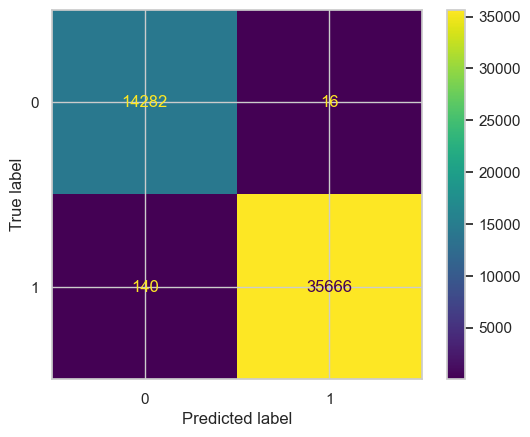

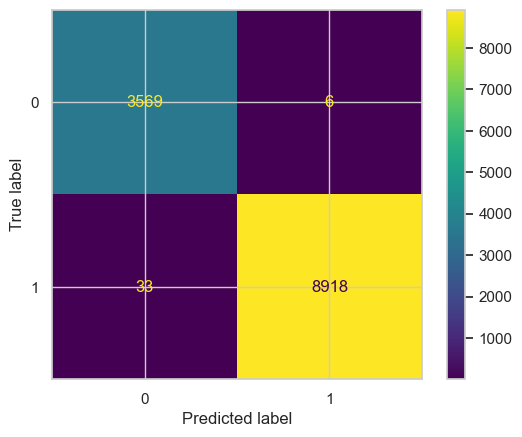

In [23]:
svcp1=grid_searchs.predict(smoke_train)
svcp2=grid_searchs.predict(smoke_test)
ConfusionMatrixDisplay.from_predictions(smoke_train_label,svcp1)
ConfusionMatrixDisplay.from_predictions(smoke_test_label,svcp2)
plt.show()

>>## precision :How many times I predict the TP right on point .

In [24]:
precision_score(smoke_test_label,svcp2)

0.999327655759749

>>## recall : the number of prediction .

In [25]:
recall_score(smoke_test_label,svcp2)

0.9963132610881466

>>## F1 score shows the ratio between the precision and the recall

In [26]:
f1_score(smoke_test_label,svcp2)

0.9978181818181817

>>#### The code below shows the second classifier which is Logistic Regression . It works as Linear regression but it gives the probability of each class and then I choose the highest probablitiy .
>>#### Also we used Randomized search that takes the classifier , the parameters , accuracy as scoring technique and error score .
* error score : Value to assign to the score if an error occurs in estimator fitting. If set to ‘raise’, the error is raised. If a numeric value is given, FitFailedWarning is raised. This parameter does not affect the refit step, which will always raise the error

In [27]:
log_reg = LogisticRegression(max_iter=1000)
log_params = [
{'C': [10,50,100],
'n_jobs': [-1,5,16]
}]
rand_search = RandomizedSearchCV(log_reg,log_params, cv=3,scoring='accuracy', random_state=42,error_score='raise')
rand_search.fit(smoke_train, smoke_train_label)

c:\Users\DELL\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=LogisticRegression(max_iter=1000),
                   param_distributions=[{'C': [10, 50, 100],
                                         'n_jobs': [-1, 5, 16]}],
                   random_state=42, scoring='accuracy')

>>#### This classifier takes 2 parameters : 
* C
* n_jobs : number of used resources (when it's -1 it will use all the avaliable resources).
* max_iter : number of maximum iterations.

>>## the best parameters are :
* C =100 , max_iter=1000, n_jobs=-1.

In [28]:
rand_search.best_estimator_

LogisticRegression(C=100, max_iter=1000, n_jobs=-1)

In [29]:
rand_search.best_params_

{'n_jobs': -1, 'C': 100}

>>## The best score is 0.9972257711920293 when using this classifier.

In [30]:
rand_search.best_score_

0.9972257711920293

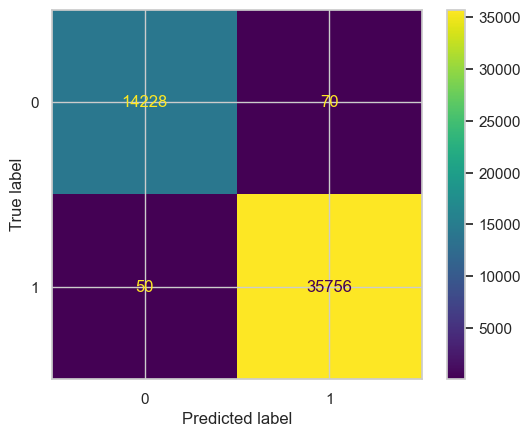

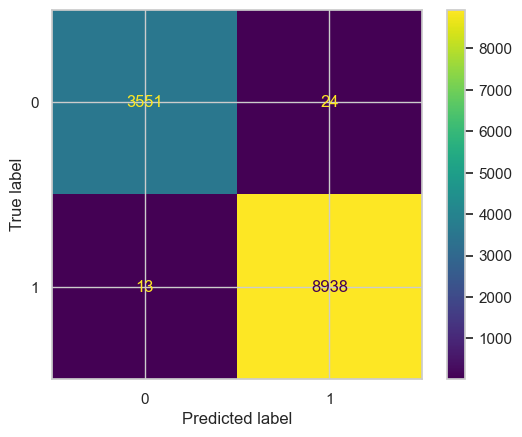

In [31]:
P1=rand_search.predict(smoke_train)
P2=rand_search.predict(smoke_test)
ConfusionMatrixDisplay.from_predictions(smoke_train_label,P1)
ConfusionMatrixDisplay.from_predictions(smoke_test_label,P2)
plt.show()

In [32]:
precision_score(smoke_test_label,P2)

0.9973220263334077

In [33]:
recall_score(smoke_test_label,P2)

0.9985476483074517

In [34]:
f1_score(smoke_test_label,P2)

0.9979344610059733

>>#### The code below shows the third classifier whic is K-neighors classifier . It chooses the closests K to it and then chooses the majority class .

In [35]:
knn_clf = KNeighborsClassifier()
knn_params = [{
'n_neighbors':[3,5,7],
'weights':['uniform','distance'],
'algorithm':['auto', 'ball_tree', 'kd_tree'],
'leaf_size':[50,100]
}]
randknn_search = RandomizedSearchCV(knn_clf,knn_params, cv=3,scoring='accuracy', random_state=42,error_score='raise')
randknn_search.fit(smoke_train,smoke_train_label)

RandomizedSearchCV(cv=3, error_score='raise', estimator=KNeighborsClassifier(),
                   param_distributions=[{'algorithm': ['auto', 'ball_tree',
                                                       'kd_tree'],
                                         'leaf_size': [50, 100],
                                         'n_neighbors': [3, 5, 7],
                                         'weights': ['uniform', 'distance']}],
                   random_state=42, scoring='accuracy')

>>#### The parameters are :
* n_neighbors : number of neighbors for the predicted sample (preferred to be odd number).
* weights : weight fuction used in perdict.
* algorithm : Algorithm used to compute the nearest neighbors
* leaf_size : the maximum number of samples in the leaf node .

>>## The best parameters are :
* weights= distance, n_neighbors= 7, leaf_size= 100, algorithm=kd_tree

In [36]:
randknn_search.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=100, n_neighbors=7,
                     weights='distance')

In [37]:
randknn_search.best_params_

{'weights': 'distance',
 'n_neighbors': 7,
 'leaf_size': 100,
 'algorithm': 'kd_tree'}

>>## The best score is 0.9997205791992337 when we used this classifier .

In [38]:
randknn_search.best_score_

0.9997205791992337

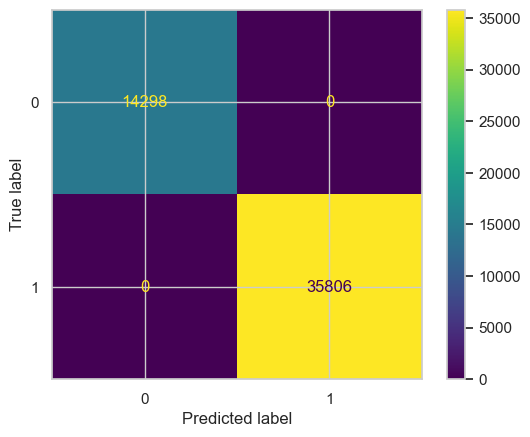

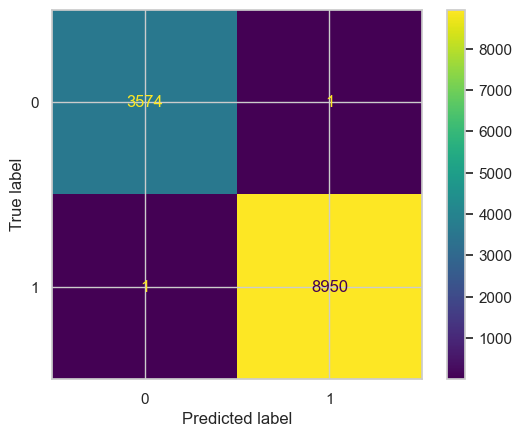

In [39]:
knn1=randknn_search.predict(smoke_train)
knn2=randknn_search.predict(smoke_test)
ConfusionMatrixDisplay.from_predictions(smoke_train_label,knn1)
ConfusionMatrixDisplay.from_predictions(smoke_test_label,knn2)
plt.show()

In [40]:
precision_score(smoke_test_label,P2)

0.9973220263334077

In [41]:
recall_score(smoke_test_label,P2)

0.9985476483074517

In [42]:
f1_score(smoke_test_label,P2)

0.9979344610059733

>>#### This code shows the Random Forest Classifier , which fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [43]:
forest_clf = RandomForestClassifier()
param_grid = [{
'n_estimators':[500,1000],
'min_samples_split':[2,3],
'max_depth' :[2,4],
'random_state':[42]
}]
grid_searchf = GridSearchCV(forest_clf, param_grid, cv=3, scoring='accuracy',error_score='raise')
grid_searchf.fit(smoke_train, smoke_train_label)

GridSearchCV(cv=3, error_score='raise', estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 4], 'min_samples_split': [2, 3],
                          'n_estimators': [500, 1000], 'random_state': [42]}],
             scoring='accuracy')

>>#### The parameters are :
* n_estimators : number of trees in the forest
* min_samples_split : minimum number of samples required to split an internal node . 
* max_depth : maximum level of splits .
*  random_state.

>>## The best parameters are :
* max_depth= 4,min_samples_split= 2,n_estimators= 500,random_state = 42

In [44]:
grid_searchf.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=42)

In [45]:
grid_searchf.best_params_

{'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 42}

>>## The best score is 0.9995609117066526 when we used this classifier .

In [46]:
grid_searchf.best_score_

0.9995609117066526

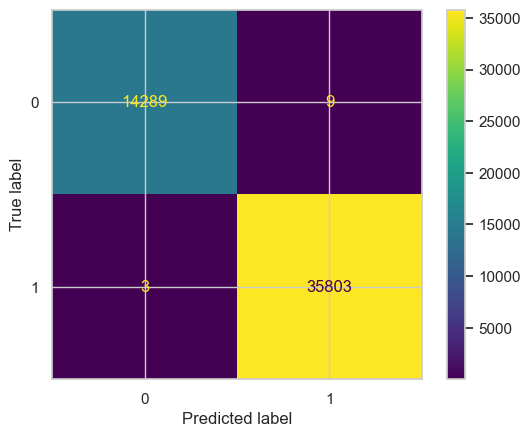

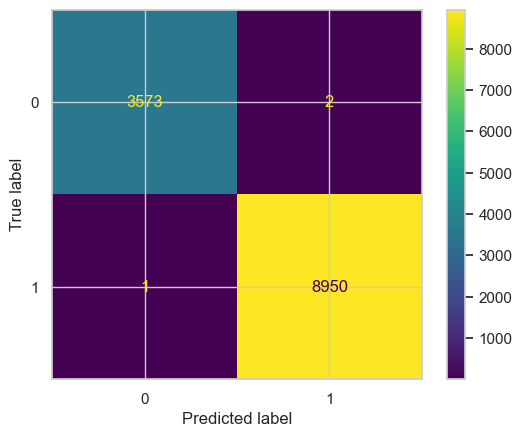

In [47]:
randp1=grid_searchf.predict(smoke_train)
randp2=grid_searchf.predict(smoke_test)
ConfusionMatrixDisplay.from_predictions(smoke_train_label,randp1)
ConfusionMatrixDisplay.from_predictions(smoke_test_label,randp2)
plt.show()

In [48]:
precision_score(smoke_test_label,randp2)

0.9997765862377123

In [49]:
recall_score(smoke_test_label,randp2)

0.9998882806390348

In [50]:
f1_score(smoke_test_label,randp2)

0.9998324303189411

>>#### This code shows the  final classifier which is The Decision Tree Classifier . In case that there are multiple classes with the same and highest probability, the classifier will predict the class with the lowest index amongst those classes.
 

In [51]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_params = [
{'criterion': ['gini', 'entropy', 'log_loss'],
'splitter': ['random'],
'min_samples_split':[5,7,6],
'max_depth': [2,4,6]}]
RandomizedSearch = RandomizedSearchCV(tree_clf,tree_params, cv=3,scoring='accuracy')
RandomizedSearch.fit(smoke_train, smoke_train_label)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions=[{'criterion': ['gini', 'entropy',
                                                       'log_loss'],
                                         'max_depth': [2, 4, 6],
                                         'min_samples_split': [5, 7, 6],
                                         'splitter': ['random']}],
                   scoring='accuracy')

>>#### The parameters are:
* criterion : The function to measure the quality of a split.
* splitter :The strategy used to choose the split at each node. 
* min_samples_split.
* max_depth .

>>## The best parameters are :
* max_depth= 6 , min_samples_split= 5 , criterion= 'log_loss' ,random_state = 42 , splitter= random.

In [52]:
RandomizedSearch.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=6, min_samples_split=5,
                       random_state=42, splitter='random')

In [53]:
RandomizedSearch.best_params_

{'splitter': 'random',
 'min_samples_split': 5,
 'max_depth': 6,
 'criterion': 'log_loss'}

>>## The best score is 0.9989022792666314 when we used this classifier .

In [54]:
RandomizedSearch.best_score_

0.9989022792666314

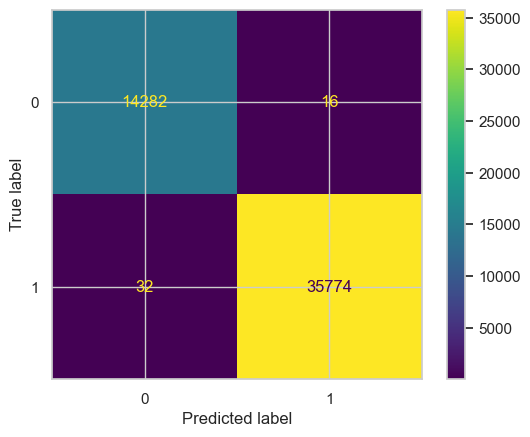

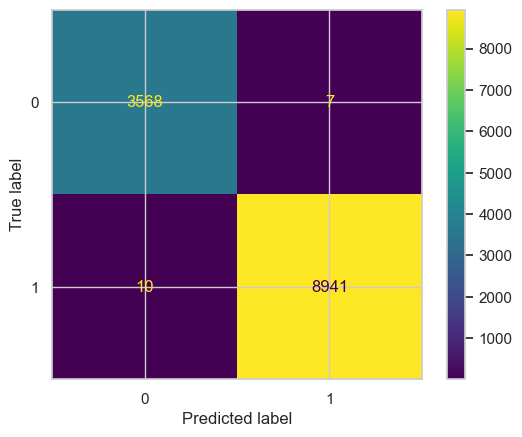

In [55]:
rasp1=RandomizedSearch.predict(smoke_train)
rasp2=RandomizedSearch.predict(smoke_test)
ConfusionMatrixDisplay.from_predictions(smoke_train_label,rasp1)
ConfusionMatrixDisplay.from_predictions(smoke_test_label,rasp2)
plt.show()

In [56]:
precision_score(smoke_test_label,rasp2)

0.9992177022798391

In [57]:
recall_score(smoke_test_label,rasp2)

0.9988828063903474

In [58]:
f1_score(smoke_test_label,rasp2)

0.9990502262696241

>>### Here we visualized the descision tree

[Text(0.5775, 0.9444444444444444, 'x[13] <= -0.628\ngini = 0.408\nsamples = 50104\nvalue = [14298, 35806]'),
 Text(0.5375, 0.8333333333333334, 'x[5] <= 0.965\ngini = 0.383\nsamples = 19269\nvalue = [14298, 4971]'),
 Text(0.255, 0.7222222222222222, 'x[7] <= -3.492\ngini = 0.211\nsamples = 13905\nvalue = [12242, 1663]'),
 Text(0.14, 0.6111111111111112, 'x[0] <= 1.009\ngini = 0.037\nsamples = 801\nvalue = [15, 786]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.18, 0.5, 'gini = 0.0\nsamples = 786\nvalue = [0, 786]'),
 Text(0.37, 0.6111111111111112, 'x[2] <= 1.015\ngini = 0.125\nsamples = 13104\nvalue = [12227, 877]'),
 Text(0.26, 0.5, 'x[13] <= -0.947\ngini = 0.088\nsamples = 12762\nvalue = [12176, 586]'),
 Text(0.16, 0.3888888888888889, 'x[13] <= -1.383\ngini = 0.001\nsamples = 10125\nvalue = [10121, 4]'),
 Text(0.08, 0.2777777777777778, 'x[11] <= -0.091\ngini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.04, 0.16666666666666666, 'gini = 0.0\nsamples = 13\nv

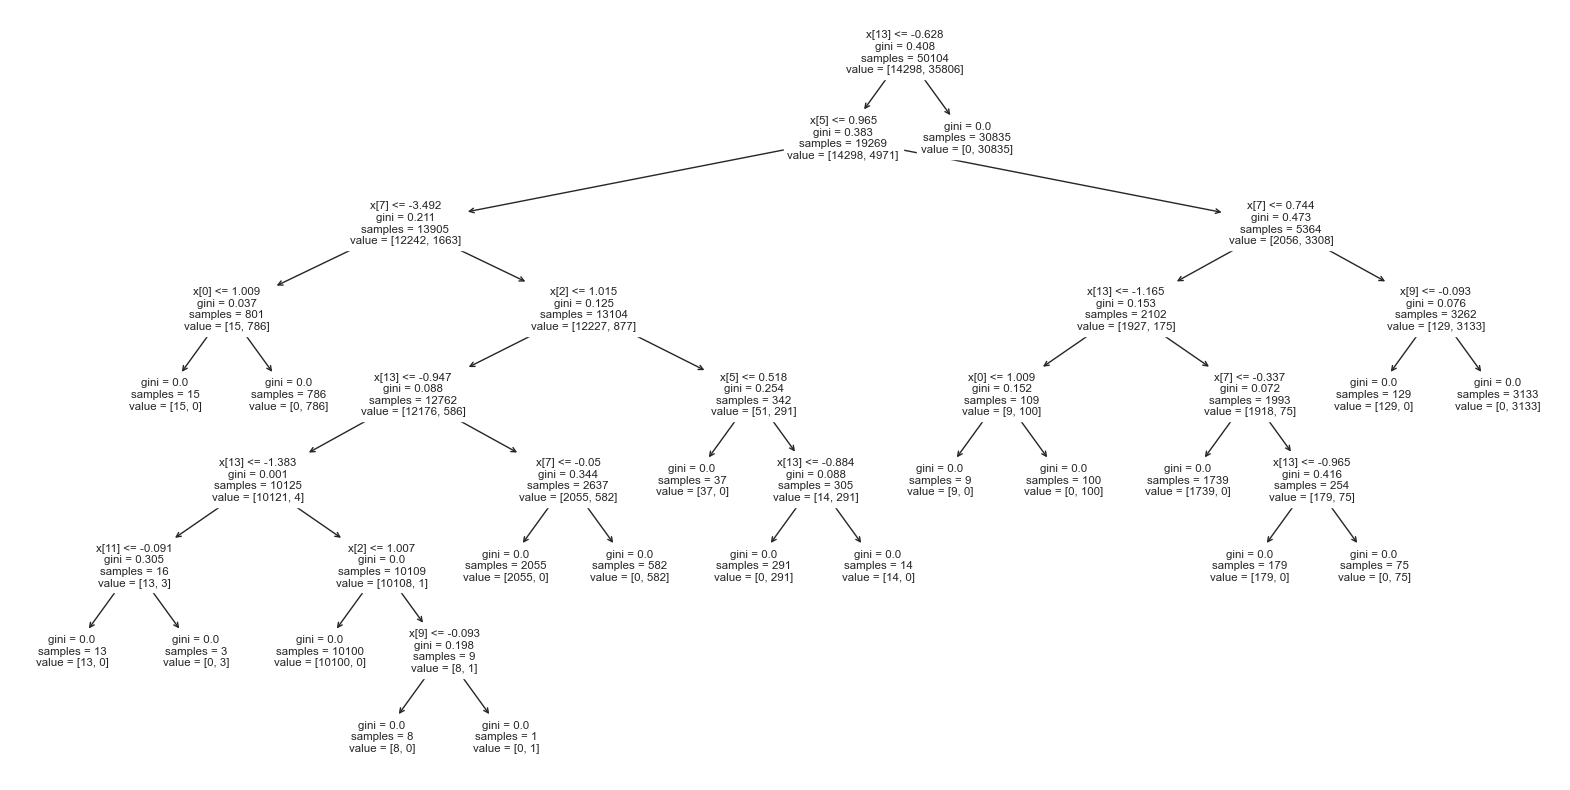

In [59]:
from sklearn import tree
tree_clf.fit(smoke_train, smoke_train_label)

plt.figure(figsize=(20,10))
tree.plot_tree(tree_clf)

>## **The code below shows the SGD Classifier that is used to find the tradeoff between the Precision and Recall**
>>>### We used cross_val_predict to predict values and it returns boolean values of each sample and we used decision fuction to represent these values as numerical values.
>* We represent the range of 50 samples [200-250] to print the values of precision , recall, threshold.

>>## We decided to take the value 2 for the threshold because the precision starts to be higher than recall at this point 

Precisions :  [0.72618854 0.72624746 0.72630639 0.72636533 0.72642428 0.72648324
 0.72654221 0.72660119 0.72666017 0.72671917 0.72677817 0.72683719
 0.72689622 0.72695525 0.72701429 0.72707335 0.72713241 0.72719149
 0.72725057 0.72730966 0.72736876 0.72742787 0.727487   0.72754613
 0.72760527 0.72766442 0.72772358 0.72778275 0.72784193 0.72790111
 0.72796031 0.72801952 0.72807874 0.72813796 0.7281972  0.72825645
 0.7283157  0.72837497 0.72843424 0.72849353 0.72855282 0.72861213
 0.72867144 0.72873077 0.7287901  0.72884944 0.72890879 0.72896816
 0.72902753 0.72908691] 

 Recalls :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.] 

 Thresholds :  [-69.09133889 -68.86700151 -68.12293747 -67.8842286  -67.17705257
 -67.10354446 -66.98371773 -66.81812475 -66.69489947 -66.6537292
 -66.36342874 -65.78983893 -65.18044364 -64.71146425 -64.34845072
 -64.15090213 -64.02967108 -63.36116919 -63.

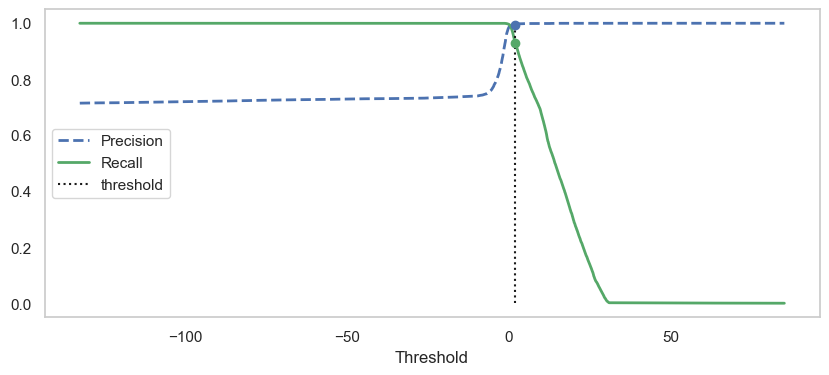

In [60]:
sgd_clf = SGDClassifier(random_state=42)
testlow_scores = cross_val_predict(sgd_clf, smoke_test, smoke_test_label, cv=3,method="decision_function")
precisionsL, recallsL, thresholdsL = precision_recall_curve(smoke_test_label, testlow_scores)
print("Precisions : ",precisionsL[200:250],"\n\n","Recalls : ", recallsL[200:250],"\n\n", "Thresholds : ",thresholdsL[200:250])
thresholdL = 2
label_scores_predL = (testlow_scores > thresholdL)
label_scores_predL=pd.DataFrame(label_scores_predL)
plt.figure(figsize=(10, 4))
plt.plot(thresholdsL, precisionsL[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholdsL, recallsL[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(thresholdL, 0, 1.0, "k", "dotted", label="threshold")
idxL = (thresholdsL >= thresholdL).argmax()
plt.plot(thresholdsL[idxL], precisionsL[idxL], "bo")
plt.plot(thresholdsL[idxL], recallsL[idxL], "go")
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.show()

# This part for training neural  network 

| Properties| Model: "sequential" | Model: "functional" | Model: "best_model from keras tuner" |
| ---------|----------|----------|----------|
Activation function | Relu , Sigmoid  |  Relu , Sigmoid  | Relu, Tanh, Sigmoid |
Optimizer | adam  | adam | adam |
Initializer | he_normal , GlorotUniformol  | he_normal , GlorotUniformol | he_normal , GlorotUniformol |
Dropout | Yes (0.15) | No | Yes (0.5) |

>>## Perceptron which is the main component for neural network (neuron), so we decided to use it to predict the train and test data

In [61]:
from sklearn.linear_model import Perceptron
per_clf = Perceptron(random_state=42)
per_train_pred= cross_val_predict(per_clf, smoke_train, smoke_train_label, cv=3)
per_test_pred= cross_val_predict(per_clf, smoke_test, smoke_test_label, cv=3)

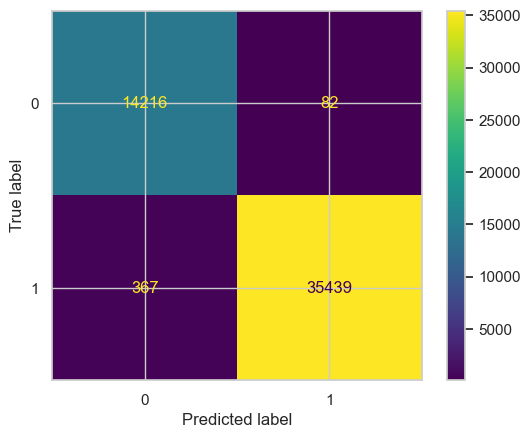

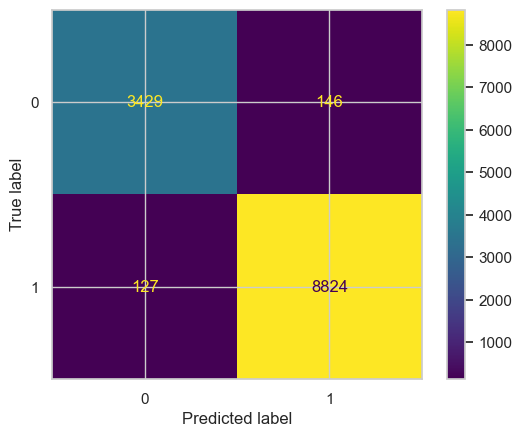

In [62]:
ConfusionMatrixDisplay.from_predictions(smoke_train_label,per_train_pred)
ConfusionMatrixDisplay.from_predictions(smoke_test_label,per_test_pred)

In [63]:
precision_score(smoke_test_label,per_test_pred)

0.9837235228539576

In [64]:
recall_score(smoke_test_label,per_test_pred)

0.9858116411574126

In [65]:
f1_score(smoke_test_label,per_test_pred)

0.9847664750850956

>>## Here we chose the Sequential neural network first , we added 3 Dense layers , 2 Dropout layers .

In [66]:
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Dense(500, activation="relu",    kernel_initializer="he_normal", bias_initializer="ones",      name = 'Input',     input_shape=(14,)))
model.add(keras.layers.Dropout(rate=0.15))
model.add(keras.layers.Dense(250, activation="relu",    kernel_initializer="he_normal",    bias_initializer="ones",    name = 'Hidden_1'))
model.add(keras.layers.Dropout(rate=0.15))
model.add(keras.layers.Dense(125, activation="relu",    kernel_initializer="he_normal",    bias_initializer="ones",    name = 'Hidden_2'))
model.add(keras.layers.Dense(1,   activation="sigmoid", kernel_initializer="GlorotUniform",  bias_initializer="ones",  name ='Output'))
model.compile(
loss="binary_crossentropy",
optimizer="adam",
metrics=["accuracy"])
history = model.fit(smoke_train, smoke_train_label, epochs=50 ,validation_split=0.2 ,callbacks=[EarlyStopping('val_loss',patience=10),ModelCheckpoint("my_keras_model",save_best_only=True)],use_multiprocessing=True)



Epoch 1/50


1249/1253 [============================>.] - ETA: 0s - loss: 0.0480 - accuracy: 0.9851INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


1253/1253 [==============================] - 13s 9ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 2/50
1253/1253 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9949INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


1253/1253 [==============================] - 11s 9ms/step - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.0016 - val_accuracy: 0.9995
Epoch 3/50
1250/1253 [============================>.] - ETA: 0s - loss: 0.0078 - accuracy: 0.9981INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


1253/1253 [==============================] - 11s 8ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.0016 - val_accuracy: 0.9998
Epoch 4/50
1248/1253 [============================>.] - ETA: 0s - loss: 0.0096 - accuracy: 0.9980INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


1253/1253 [==============================] - 11s 8ms/step - loss: 0.0096 - accuracy: 0.9980 - val_loss: 7.4160e-04 - val_accuracy: 0.9998
Epoch 5/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0015 - val_accuracy: 0.9995
Epoch 6/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 7/50
1246/1253 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9988INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


1253/1253 [==============================] - 10s 8ms/step - loss: 0.0061 - accuracy: 0.9988 - val_loss: 3.4835e-04 - val_accuracy: 0.9999
Epoch 8/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 7.3114e-04 - val_accuracy: 0.9998
Epoch 9/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0013 - val_accuracy: 0.9993
Epoch 10/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 5.0979e-04 - val_accuracy: 0.9999
Epoch 11/50
1251/1253 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 0.9993INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


1253/1253 [==============================] - 11s 9ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 1.9325e-04 - val_accuracy: 0.9999
Epoch 12/50
1251/1253 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9991INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


1253/1253 [==============================] - 11s 9ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 1.6104e-04 - val_accuracy: 0.9999
Epoch 13/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0018 - val_accuracy: 0.9990
Epoch 14/50
1248/1253 [============================>.] - ETA: 0s - loss: 0.0027 - accuracy: 0.9995INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


1253/1253 [==============================] - 10s 8ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 1.0404e-04 - val_accuracy: 0.9999
Epoch 15/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 7.2178e-04 - val_accuracy: 0.9998
Epoch 16/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy: 0.9998
Epoch 17/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 3.7983e-04 - val_accuracy: 0.9998
Epoch 18/50
1250/1253 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9994INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


1253/1253 [==============================] - 10s 8ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 9.9873e-05 - val_accuracy: 1.0000
Epoch 19/50
1252/1253 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9994INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


1253/1253 [==============================] - 11s 9ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 5.1722e-05 - val_accuracy: 1.0000
Epoch 20/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 9.7797e-05 - val_accuracy: 0.9999
Epoch 21/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 1.5200e-04 - val_accuracy: 0.9999
Epoch 22/50
1248/1253 [============================>.] - ETA: 0s - loss: 0.0047 - accuracy: 0.9993INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


1253/1253 [==============================] - 11s 9ms/step - loss: 0.0047 - accuracy: 0.9993 - val_loss: 3.5115e-05 - val_accuracy: 1.0000
Epoch 23/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 3.1460e-04 - val_accuracy: 0.9999
Epoch 24/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 2.1862e-04 - val_accuracy: 0.9999
Epoch 25/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0016 - val_accuracy: 0.9993
Epoch 26/50
1253/1253 [==============================] - 9s 7ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 2.6109e-04 - val_accuracy: 1.0000
Epoch 27/50
1253/1253 [==============================] - 9s 7ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 6.4621e-05 - val_accuracy: 1.0000
Epoch 28/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 8.

INFO:tensorflow:Assets written to: my_keras_model\assets


1253/1253 [==============================] - 10s 8ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 9.4145e-06 - val_accuracy: 1.0000
Epoch 33/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 2.9539e-04 - val_accuracy: 0.9999
Epoch 34/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0024 - accuracy: 0.9998 - val_loss: 2.5807e-05 - val_accuracy: 1.0000
Epoch 35/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 4.9395e-05 - val_accuracy: 1.0000
Epoch 36/50
1253/1253 [==============================] - 10s 8ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 4.0497e-05 - val_accuracy: 1.0000
Epoch 37/50
1253/1253 [==============================] - 9s 8ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 6.6436e-04 - val_accuracy: 0.9996
Epoch 38/50
1253/1253 [==============================] - 9s 7ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 500)               7500      
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 Hidden_1 (Dense)            (None, 250)               125250    
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 Hidden_2 (Dense)            (None, 125)               31375     
                                                                 
 Output (Dense)              (None, 1)                 126       
                                                                 
Total params: 164251 (641.61 KB)
Trainable params: 16425

>>### Evaluate returns the accuracy and loss of the data

In [68]:

train_loss, train_acc = model.evaluate(smoke_train, smoke_train_label)
train_acc*100 ,train_loss*100

  52/1566 [..............................] - ETA: 3s - loss: 8.1926e-06 - accuracy: 1.00001566/1566 [==============================] - 3s 2ms/step - loss: 0.0013 - accuracy: 0.9997


(99.96806383132935, 0.1282897195778787)

(99.96806383132935, 0.1282897195778787)

>>## These two graphs describes the relation between training accuracy and validation accuray and the relation between the training loss and the validation loss respectively
>>>* Clearly we can see that at the beginning there is an underfitting  

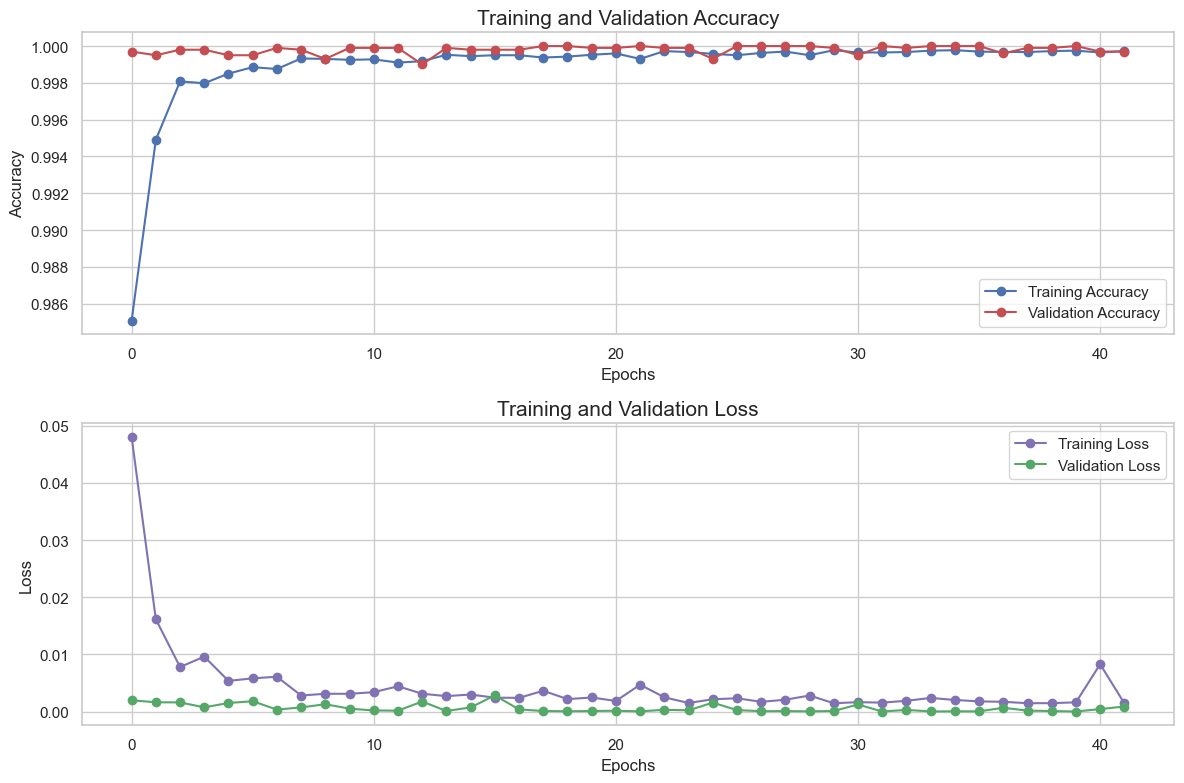

In [69]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']

plt.figure(figsize=(12, 8))

# Plot Training and Validation Accuracy
plt.subplot(2, 1, 1)
plt.plot(acc_train, 'bo-', label='Training Accuracy')
plt.plot(acc_val, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True)

loss_train = history.history['loss']
loss_val = history.history['val_loss']

# Plot Training and Validation Loss
plt.subplot(2, 1, 2)
plt.plot(loss_train, 'mo-', label='Training Loss')
plt.plot(loss_val, 'go-', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True)

plt.tight_layout()

>>### Here we used our model to predict the trianed data that is greater than 0.9

1566/1566 [==============================] - 2s 1ms/step


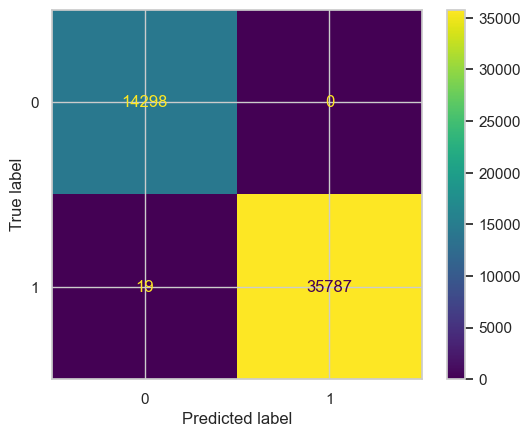

In [70]:
y_proba = model.predict(smoke_train)
#predict_classes was removed  so here is alterative way to find the confusion matrix
Seq_pred_classes = (y_proba > 0.9).astype(int)
ConfusionMatrixDisplay.from_predictions(smoke_train_label,Seq_pred_classes)


In [71]:
seq_a= accuracy_score(smoke_train_label,Seq_pred_classes) 
print("Accuracy : ",seq_a)
seq_p= precision_score(smoke_train_label,Seq_pred_classes)
print("Precision: ",seq_p)
seq_r= recall_score(smoke_train_label,Seq_pred_classes) 
print("Recall: ",seq_r)
seq_f= f1_score(smoke_train_label,Seq_pred_classes) 
print("F1 score: ", seq_f)

Accuracy :  0.9996207887593805
Precision:  1.0
Recall:  0.9994693626766463
F1 score:  0.9997346109256491


>>### Here we used our model to predict the test data that is greater than 0.5

 33/392 [=>............................] - ETA: 0s 392/392 [==============================] - 1s 1ms/step


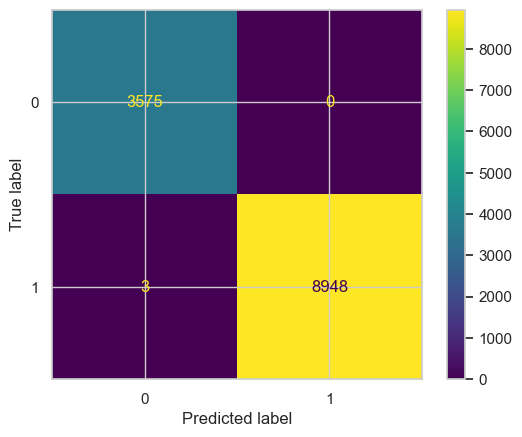

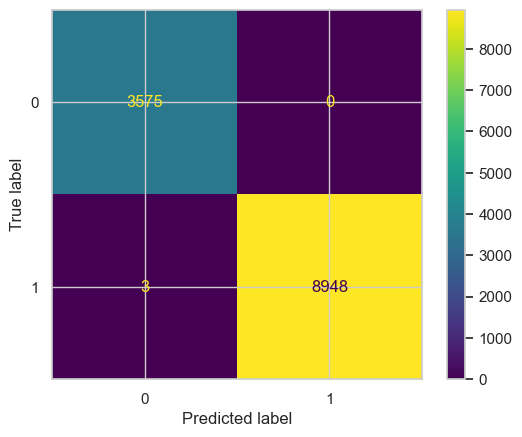

In [72]:
y_proba = model.predict(smoke_test)
#predict_classes was removed  so here is alterative way to find the confusion matrix
Seq_pred_classes = (y_proba > 0.5).astype(int)
ConfusionMatrixDisplay.from_predictions(smoke_test_label,Seq_pred_classes)

In [73]:
seq_a= accuracy_score(smoke_test_label,Seq_pred_classes) 
print("Accuracy : ",seq_a)
seq_p= precision_score(smoke_test_label,Seq_pred_classes)
print("Precision: ",seq_p)
seq_r= recall_score(smoke_test_label,Seq_pred_classes) 
print("Recall: ",seq_r)
seq_f= f1_score(smoke_test_label,Seq_pred_classes) 
print("F1 score: ", seq_f)

Accuracy :  0.9997604981638193
Precision:  1.0
Recall:  0.9996648419171043
F1 score:  0.9998323928711101


>>## Here we used the Functional API to build our neural network 

In [74]:
input_wide = tf.keras.layers.Input(shape=[2])  
input_deep = tf.keras.layers.Input(shape=[12])  
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_wide)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden3 = tf.keras.layers.Dense(30, activation="relu")(hidden2)
concat = tf.keras.layers.concatenate([hidden1, hidden3])
output = tf.keras.layers.Dense(1,activation="sigmoid")(concat)
aux_output = tf.keras.layers.Dense(1,activation="sigmoid")(hidden1)
model = tf.keras.Model(inputs=[input_wide, input_deep],outputs=[output, aux_output])

In [75]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("binary_crossentropy","binary_crossentropy"),loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["accuracy"])


>> # Summury for the functional model

In [76]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 12)]                 0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 normalization_1 (Normaliza  (None, 12)                   25        ['input_2[0][0]']             
 tion)                                                                                            
                                                                                                  
 normalization (Normalizati  (None, 2)                    5         ['input_1[0][0]']         

>>### Fun_train_wide has the first 2 features and the rest of them are in Fun_train_deep

In [77]:
Fun_train_wide=smoke_train.iloc[:,:2].values 
Fun_train_deep=smoke_train.iloc[:, [i for i in range(14) if i not in [0, 1]]].values
norm_layer_wide.adapt(Fun_train_wide)
norm_layer_deep.adapt(Fun_train_deep)
history = model.fit((Fun_train_wide, Fun_train_deep),(smoke_train_label,smoke_train_label), epochs=50,
                    validation_split=0.2,callbacks=[EarlyStopping('val_loss',patience=10),ModelCheckpoint("my_keras_model2",save_best_only=True)],use_multiprocessing=True)


Epoch 1/50
1227/1253 [============================>.] - ETA: 0s - loss: 0.1037 - dense_3_loss: 0.0702 - dense_4_loss: 0.4043 - dense_3_accuracy: 0.9800 - dense_4_accuracy: 0.8563INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 7s 4ms/step - loss: 0.1023 - dense_3_loss: 0.0690 - dense_4_loss: 0.4018 - dense_3_accuracy: 0.9804 - dense_4_accuracy: 0.8576 - val_loss: 0.0354 - val_dense_3_loss: 0.0099 - val_dense_4_loss: 0.2650 - val_dense_3_accuracy: 0.9983 - val_dense_4_accuracy: 0.9297
Epoch 2/50
1239/1253 [============================>.] - ETA: 0s - loss: 0.0284 - dense_3_loss: 0.0064 - dense_4_loss: 0.2258 - dense_3_accuracy: 0.9995 - dense_4_accuracy: 0.9358INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 5s 4ms/step - loss: 0.0284 - dense_3_loss: 0.0065 - dense_4_loss: 0.2255 - dense_3_accuracy: 0.9995 - dense_4_accuracy: 0.9358 - val_loss: 0.0229 - val_dense_3_loss: 0.0031 - val_dense_4_loss: 0.2015 - val_dense_3_accuracy: 0.9998 - val_dense_4_accuracy: 0.9380
Epoch 3/50
1231/1253 [============================>.] - ETA: 0s - loss: 0.0225 - dense_3_loss: 0.0038 - dense_4_loss: 0.1908 - dense_3_accuracy: 0.9996 - dense_4_accuracy: 0.9394INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 4s 3ms/step - loss: 0.0225 - dense_3_loss: 0.0038 - dense_4_loss: 0.1909 - dense_3_accuracy: 0.9996 - dense_4_accuracy: 0.9392 - val_loss: 0.0201 - val_dense_3_loss: 0.0021 - val_dense_4_loss: 0.1813 - val_dense_3_accuracy: 0.9996 - val_dense_4_accuracy: 0.9388
Epoch 4/50
1253/1253 [==============================] - ETA: 0s - loss: 0.0203 - dense_3_loss: 0.0029 - dense_4_loss: 0.1767 - dense_3_accuracy: 0.9996 - dense_4_accuracy: 0.9380INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 5s 4ms/step - loss: 0.0203 - dense_3_loss: 0.0029 - dense_4_loss: 0.1767 - dense_3_accuracy: 0.9996 - dense_4_accuracy: 0.9380 - val_loss: 0.0185 - val_dense_3_loss: 0.0017 - val_dense_4_loss: 0.1696 - val_dense_3_accuracy: 0.9995 - val_dense_4_accuracy: 0.9373
Epoch 5/50
1233/1253 [============================>.] - ETA: 0s - loss: 0.0190 - dense_3_loss: 0.0025 - dense_4_loss: 0.1670 - dense_3_accuracy: 0.9995 - dense_4_accuracy: 0.9364INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 4s 3ms/step - loss: 0.0189 - dense_3_loss: 0.0025 - dense_4_loss: 0.1669 - dense_3_accuracy: 0.9995 - dense_4_accuracy: 0.9363 - val_loss: 0.0173 - val_dense_3_loss: 0.0014 - val_dense_4_loss: 0.1604 - val_dense_3_accuracy: 0.9997 - val_dense_4_accuracy: 0.9372
Epoch 6/50
1242/1253 [============================>.] - ETA: 0s - loss: 0.0178 - dense_3_loss: 0.0021 - dense_4_loss: 0.1595 - dense_3_accuracy: 0.9996 - dense_4_accuracy: 0.9360INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 5s 4ms/step - loss: 0.0180 - dense_3_loss: 0.0023 - dense_4_loss: 0.1595 - dense_3_accuracy: 0.9996 - dense_4_accuracy: 0.9360 - val_loss: 0.0164 - val_dense_3_loss: 0.0012 - val_dense_4_loss: 0.1532 - val_dense_3_accuracy: 0.9999 - val_dense_4_accuracy: 0.9372
Epoch 7/50
1241/1253 [============================>.] - ETA: 0s - loss: 0.0172 - dense_3_loss: 0.0021 - dense_4_loss: 0.1533 - dense_3_accuracy: 0.9996 - dense_4_accuracy: 0.9359INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0172 - dense_3_loss: 0.0021 - dense_4_loss: 0.1533 - dense_3_accuracy: 0.9996 - dense_4_accuracy: 0.9360 - val_loss: 0.0155 - val_dense_3_loss: 8.7743e-04 - val_dense_4_loss: 0.1470 - val_dense_3_accuracy: 0.9998 - val_dense_4_accuracy: 0.9372
Epoch 8/50
1252/1253 [============================>.] - ETA: 0s - loss: 0.0165 - dense_3_loss: 0.0019 - dense_4_loss: 0.1479 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9363INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0165 - dense_3_loss: 0.0019 - dense_4_loss: 0.1479 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9363 - val_loss: 0.0148 - val_dense_3_loss: 7.5545e-04 - val_dense_4_loss: 0.1410 - val_dense_3_accuracy: 0.9997 - val_dense_4_accuracy: 0.9374
Epoch 9/50
1243/1253 [============================>.] - ETA: 0s - loss: 0.0157 - dense_3_loss: 0.0017 - dense_4_loss: 0.1417 - dense_3_accuracy: 0.9996 - dense_4_accuracy: 0.9370INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0157 - dense_3_loss: 0.0017 - dense_4_loss: 0.1415 - dense_3_accuracy: 0.9996 - dense_4_accuracy: 0.9371 - val_loss: 0.0135 - val_dense_3_loss: 5.0262e-04 - val_dense_4_loss: 0.1308 - val_dense_3_accuracy: 0.9998 - val_dense_4_accuracy: 0.9397
Epoch 10/50
1249/1253 [============================>.] - ETA: 0s - loss: 0.0145 - dense_3_loss: 0.0018 - dense_4_loss: 0.1285 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9393INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 7s 6ms/step - loss: 0.0145 - dense_3_loss: 0.0018 - dense_4_loss: 0.1284 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9393 - val_loss: 0.0126 - val_dense_3_loss: 6.4630e-04 - val_dense_4_loss: 0.1205 - val_dense_3_accuracy: 0.9999 - val_dense_4_accuracy: 0.9475
Epoch 11/50
1250/1253 [============================>.] - ETA: 0s - loss: 0.0135 - dense_3_loss: 0.0017 - dense_4_loss: 0.1197 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9470INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0135 - dense_3_loss: 0.0017 - dense_4_loss: 0.1197 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9470 - val_loss: 0.0117 - val_dense_3_loss: 4.7152e-04 - val_dense_4_loss: 0.1123 - val_dense_3_accuracy: 0.9999 - val_dense_4_accuracy: 0.9573
Epoch 12/50
1248/1253 [============================>.] - ETA: 0s - loss: 0.0125 - dense_3_loss: 0.0014 - dense_4_loss: 0.1120 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9596INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0125 - dense_3_loss: 0.0014 - dense_4_loss: 0.1120 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9596 - val_loss: 0.0106 - val_dense_3_loss: 4.0798e-04 - val_dense_4_loss: 0.1026 - val_dense_3_accuracy: 0.9999 - val_dense_4_accuracy: 0.9679
Epoch 13/50
1247/1253 [============================>.] - ETA: 0s - loss: 0.0114 - dense_3_loss: 0.0014 - dense_4_loss: 0.1010 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9705INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0114 - dense_3_loss: 0.0014 - dense_4_loss: 0.1012 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9704 - val_loss: 0.0099 - val_dense_3_loss: 5.1567e-04 - val_dense_4_loss: 0.0941 - val_dense_3_accuracy: 0.9999 - val_dense_4_accuracy: 0.9672
Epoch 14/50
1249/1253 [============================>.] - ETA: 0s - loss: 0.0108 - dense_3_loss: 0.0015 - dense_4_loss: 0.0939 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9761INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0108 - dense_3_loss: 0.0015 - dense_4_loss: 0.0939 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9762 - val_loss: 0.0091 - val_dense_3_loss: 4.6117e-04 - val_dense_4_loss: 0.0869 - val_dense_3_accuracy: 0.9999 - val_dense_4_accuracy: 0.9767
Epoch 15/50
1242/1253 [============================>.] - ETA: 0s - loss: 0.0101 - dense_3_loss: 0.0014 - dense_4_loss: 0.0880 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9784INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0101 - dense_3_loss: 0.0014 - dense_4_loss: 0.0880 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9784 - val_loss: 0.0085 - val_dense_3_loss: 2.9416e-04 - val_dense_4_loss: 0.0825 - val_dense_3_accuracy: 0.9999 - val_dense_4_accuracy: 0.9820
Epoch 16/50
1250/1253 [============================>.] - ETA: 0s - loss: 0.0097 - dense_3_loss: 0.0015 - dense_4_loss: 0.0832 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9800INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0097 - dense_3_loss: 0.0015 - dense_4_loss: 0.0832 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9800 - val_loss: 0.0081 - val_dense_3_loss: 4.3127e-04 - val_dense_4_loss: 0.0769 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9807
Epoch 17/50
1244/1253 [============================>.] - ETA: 0s - loss: 0.0093 - dense_3_loss: 0.0015 - dense_4_loss: 0.0794 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9805INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0093 - dense_3_loss: 0.0015 - dense_4_loss: 0.0793 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9805 - val_loss: 0.0077 - val_dense_3_loss: 2.9469e-04 - val_dense_4_loss: 0.0739 - val_dense_3_accuracy: 0.9999 - val_dense_4_accuracy: 0.9809
Epoch 18/50
1252/1253 [============================>.] - ETA: 0s - loss: 0.0088 - dense_3_loss: 0.0013 - dense_4_loss: 0.0758 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9805INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0088 - dense_3_loss: 0.0013 - dense_4_loss: 0.0758 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9805 - val_loss: 0.0072 - val_dense_3_loss: 2.6976e-04 - val_dense_4_loss: 0.0698 - val_dense_3_accuracy: 0.9999 - val_dense_4_accuracy: 0.9808
Epoch 19/50
1243/1253 [============================>.] - ETA: 0s - loss: 0.0084 - dense_3_loss: 0.0012 - dense_4_loss: 0.0731 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9810INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0084 - dense_3_loss: 0.0012 - dense_4_loss: 0.0731 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9810 - val_loss: 0.0070 - val_dense_3_loss: 3.4302e-04 - val_dense_4_loss: 0.0672 - val_dense_3_accuracy: 0.9998 - val_dense_4_accuracy: 0.9801
Epoch 20/50
1253/1253 [==============================] - 5s 4ms/step - loss: 0.0085 - dense_3_loss: 0.0016 - dense_4_loss: 0.0706 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9815 - val_loss: 0.0081 - val_dense_3_loss: 0.0018 - val_dense_4_loss: 0.0648 - val_dense_3_accuracy: 0.9995 - val_dense_4_accuracy: 0.9806
Epoch 21/50
1237/1253 [============================>.] - ETA: 0s - loss: 0.0080 - dense_3_loss: 0.0013 - dense_4_loss: 0.0684 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9815INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0080 - dense_3_loss: 0.0013 - dense_4_loss: 0.0685 - dense_3_accuracy: 0.9999 - dense_4_accuracy: 0.9814 - val_loss: 0.0067 - val_dense_3_loss: 5.1439e-04 - val_dense_4_loss: 0.0626 - val_dense_3_accuracy: 0.9999 - val_dense_4_accuracy: 0.9817
Epoch 22/50
1243/1253 [============================>.] - ETA: 0s - loss: 0.0077 - dense_3_loss: 0.0011 - dense_4_loss: 0.0666 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9817INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0077 - dense_3_loss: 0.0011 - dense_4_loss: 0.0665 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9818 - val_loss: 0.0063 - val_dense_3_loss: 2.5980e-04 - val_dense_4_loss: 0.0611 - val_dense_3_accuracy: 0.9999 - val_dense_4_accuracy: 0.9828
Epoch 23/50
1253/1253 [==============================] - 4s 4ms/step - loss: 0.0077 - dense_3_loss: 0.0013 - dense_4_loss: 0.0648 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9820 - val_loss: 0.0066 - val_dense_3_loss: 7.1007e-04 - val_dense_4_loss: 0.0593 - val_dense_3_accuracy: 0.9999 - val_dense_4_accuracy: 0.9828
Epoch 24/50
1241/1253 [============================>.] - ETA: 0s - loss: 0.0075 - dense_3_loss: 0.0013 - dense_4_loss: 0.0634 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9827INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0075 - dense_3_loss: 0.0013 - dense_4_loss: 0.0633 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9827 - val_loss: 0.0060 - val_dense_3_loss: 1.7331e-04 - val_dense_4_loss: 0.0585 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9852
Epoch 25/50
1253/1253 [==============================] - ETA: 0s - loss: 0.0072 - dense_3_loss: 0.0012 - dense_4_loss: 0.0619 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9825INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0072 - dense_3_loss: 0.0012 - dense_4_loss: 0.0619 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9825 - val_loss: 0.0058 - val_dense_3_loss: 1.6286e-04 - val_dense_4_loss: 0.0562 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9830
Epoch 26/50
1253/1253 [==============================] - 5s 4ms/step - loss: 0.0071 - dense_3_loss: 0.0012 - dense_4_loss: 0.0604 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9829 - val_loss: 0.0061 - val_dense_3_loss: 6.8070e-04 - val_dense_4_loss: 0.0552 - val_dense_3_accuracy: 0.9998 - val_dense_4_accuracy: 0.9838
Epoch 27/50
1251/1253 [============================>.] - ETA: 0s - loss: 0.0070 - dense_3_loss: 0.0012 - dense_4_loss: 0.0590 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9834INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0070 - dense_3_loss: 0.0012 - dense_4_loss: 0.0591 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9833 - val_loss: 0.0055 - val_dense_3_loss: 1.2768e-04 - val_dense_4_loss: 0.0535 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9837
Epoch 28/50
1251/1253 [============================>.] - ETA: 0s - loss: 0.0068 - dense_3_loss: 0.0011 - dense_4_loss: 0.0579 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9831INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0068 - dense_3_loss: 0.0011 - dense_4_loss: 0.0579 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9831 - val_loss: 0.0054 - val_dense_3_loss: 1.9312e-04 - val_dense_4_loss: 0.0524 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9850
Epoch 29/50
1242/1253 [============================>.] - ETA: 0s - loss: 0.0067 - dense_3_loss: 0.0012 - dense_4_loss: 0.0568 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9837INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0067 - dense_3_loss: 0.0012 - dense_4_loss: 0.0567 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9837 - val_loss: 0.0053 - val_dense_3_loss: 2.3576e-04 - val_dense_4_loss: 0.0512 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9845
Epoch 30/50
1253/1253 [==============================] - 5s 4ms/step - loss: 0.0066 - dense_3_loss: 0.0011 - dense_4_loss: 0.0558 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9839 - val_loss: 0.0071 - val_dense_3_loss: 0.0023 - val_dense_4_loss: 0.0502 - val_dense_3_accuracy: 0.9996 - val_dense_4_accuracy: 0.9851
Epoch 31/50
1253/1253 [==============================] - ETA: 0s - loss: 0.0068 - dense_3_loss: 0.0014 - dense_4_loss: 0.0549 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9841INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0068 - dense_3_loss: 0.0014 - dense_4_loss: 0.0549 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9841 - val_loss: 0.0050 - val_dense_3_loss: 1.1430e-04 - val_dense_4_loss: 0.0493 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9851
Epoch 32/50
1249/1253 [============================>.] - ETA: 0s - loss: 0.0064 - dense_3_loss: 0.0011 - dense_4_loss: 0.0540 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9845INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 7s 5ms/step - loss: 0.0064 - dense_3_loss: 0.0011 - dense_4_loss: 0.0540 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9845 - val_loss: 0.0050 - val_dense_3_loss: 1.6841e-04 - val_dense_4_loss: 0.0485 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9856
Epoch 33/50
1243/1253 [============================>.] - ETA: 0s - loss: 0.0059 - dense_3_loss: 7.4385e-04 - dense_4_loss: 0.0522 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9843INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0062 - dense_3_loss: 9.8496e-04 - dense_4_loss: 0.0528 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9844 - val_loss: 0.0048 - val_dense_3_loss: 1.1358e-04 - val_dense_4_loss: 0.0474 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9851
Epoch 34/50
1251/1253 [============================>.] - ETA: 0s - loss: 0.0061 - dense_3_loss: 9.9577e-04 - dense_4_loss: 0.0516 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9854INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0061 - dense_3_loss: 9.9455e-04 - dense_4_loss: 0.0516 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9854 - val_loss: 0.0047 - val_dense_3_loss: 1.0150e-04 - val_dense_4_loss: 0.0465 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9839
Epoch 35/50
1253/1253 [==============================] - 5s 4ms/step - loss: 0.0061 - dense_3_loss: 0.0011 - dense_4_loss: 0.0507 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9853 - val_loss: 0.0051 - val_dense_3_loss: 5.3463e-04 - val_dense_4_loss: 0.0458 - val_dense_3_accuracy: 0.9999 - val_dense_4_accuracy: 0.9865
Epoch 36/50
1253/1253 [==============================] - ETA: 0s - loss: 0.0059 - dense_3_loss: 0.0011 - dense_4_loss: 0.0498 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9855INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 4ms/step - loss: 0.0059 - dense_3_loss: 0.0011 - dense_4_loss: 0.0498 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9855 - val_loss: 0.0045 - val_dense_3_loss: 9.5599e-05 - val_dense_4_loss: 0.0445 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9869
Epoch 37/50
1253/1253 [==============================] - 5s 4ms/step - loss: 0.0057 - dense_3_loss: 8.9686e-04 - dense_4_loss: 0.0490 - dense_3_accuracy: 0.9999 - dense_4_accuracy: 0.9863 - val_loss: 0.0048 - val_dense_3_loss: 4.7880e-04 - val_dense_4_loss: 0.0437 - val_dense_3_accuracy: 0.9998 - val_dense_4_accuracy: 0.9878
Epoch 38/50
1247/1253 [============================>.] - ETA: 0s - loss: 0.0064 - dense_3_loss: 0.0018 - dense_4_loss: 0.0482 - dense_3_accuracy: 0.9996 - dense_4_accuracy: 0.9861INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0064 - dense_3_loss: 0.0018 - dense_4_loss: 0.0482 - dense_3_accuracy: 0.9996 - dense_4_accuracy: 0.9861 - val_loss: 0.0045 - val_dense_3_loss: 1.1587e-04 - val_dense_4_loss: 0.0437 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9874
Epoch 39/50
1243/1253 [============================>.] - ETA: 0s - loss: 0.0056 - dense_3_loss: 9.1607e-04 - dense_4_loss: 0.0473 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9865INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0056 - dense_3_loss: 9.0997e-04 - dense_4_loss: 0.0474 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9865 - val_loss: 0.0044 - val_dense_3_loss: 2.1579e-04 - val_dense_4_loss: 0.0425 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9885
Epoch 40/50
1243/1253 [============================>.] - ETA: 0s - loss: 0.0057 - dense_3_loss: 0.0011 - dense_4_loss: 0.0467 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9865INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0057 - dense_3_loss: 0.0011 - dense_4_loss: 0.0467 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9865 - val_loss: 0.0042 - val_dense_3_loss: 8.2867e-05 - val_dense_4_loss: 0.0413 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9885
Epoch 41/50
1253/1253 [==============================] - 5s 4ms/step - loss: 0.0054 - dense_3_loss: 9.2918e-04 - dense_4_loss: 0.0460 - dense_3_accuracy: 0.9999 - dense_4_accuracy: 0.9871 - val_loss: 0.0042 - val_dense_3_loss: 1.9004e-04 - val_dense_4_loss: 0.0407 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9869
Epoch 42/50
1252/1253 [============================>.] - ETA: 0s - loss: 0.0053 - dense_3_loss: 9.1568e-04 - dense_4_loss: 0.0451 - dense_3_accuracy: 0.9999 - dense_4_accuracy: 0.9872INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0053 - dense_3_loss: 9.1527e-04 - dense_4_loss: 0.0451 - dense_3_accuracy: 0.9999 - dense_4_accuracy: 0.9872 - val_loss: 0.0041 - val_dense_3_loss: 7.5151e-05 - val_dense_4_loss: 0.0402 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9893
Epoch 43/50
1253/1253 [==============================] - 5s 4ms/step - loss: 0.0055 - dense_3_loss: 0.0012 - dense_4_loss: 0.0444 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9875 - val_loss: 0.0041 - val_dense_3_loss: 2.1294e-04 - val_dense_4_loss: 0.0394 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9889
Epoch 44/50
1245/1253 [============================>.] - ETA: 0s - loss: 0.0052 - dense_3_loss: 8.8173e-04 - dense_4_loss: 0.0436 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9876INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 7s 5ms/step - loss: 0.0052 - dense_3_loss: 8.7685e-04 - dense_4_loss: 0.0436 - dense_3_accuracy: 0.9999 - dense_4_accuracy: 0.9876 - val_loss: 0.0040 - val_dense_3_loss: 1.0680e-04 - val_dense_4_loss: 0.0389 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9879
Epoch 45/50
1241/1253 [============================>.] - ETA: 0s - loss: 0.0051 - dense_3_loss: 8.7029e-04 - dense_4_loss: 0.0430 - dense_3_accuracy: 0.9999 - dense_4_accuracy: 0.9879INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 7s 5ms/step - loss: 0.0051 - dense_3_loss: 8.6263e-04 - dense_4_loss: 0.0429 - dense_3_accuracy: 0.9999 - dense_4_accuracy: 0.9880 - val_loss: 0.0039 - val_dense_3_loss: 7.1919e-05 - val_dense_4_loss: 0.0383 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9910
Epoch 46/50
1252/1253 [============================>.] - ETA: 0s - loss: 0.0050 - dense_3_loss: 8.6330e-04 - dense_4_loss: 0.0421 - dense_3_accuracy: 0.9999 - dense_4_accuracy: 0.9884INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0050 - dense_3_loss: 8.6293e-04 - dense_4_loss: 0.0422 - dense_3_accuracy: 0.9999 - dense_4_accuracy: 0.9884 - val_loss: 0.0039 - val_dense_3_loss: 1.5967e-04 - val_dense_4_loss: 0.0372 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9909
Epoch 47/50
1250/1253 [============================>.] - ETA: 0s - loss: 0.0050 - dense_3_loss: 9.7656e-04 - dense_4_loss: 0.0414 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9886INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 6s 5ms/step - loss: 0.0050 - dense_3_loss: 9.7481e-04 - dense_4_loss: 0.0414 - dense_3_accuracy: 0.9998 - dense_4_accuracy: 0.9886 - val_loss: 0.0037 - val_dense_3_loss: 1.2649e-04 - val_dense_4_loss: 0.0362 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9898
Epoch 48/50
1252/1253 [============================>.] - ETA: 0s - loss: 0.0048 - dense_3_loss: 8.0991e-04 - dense_4_loss: 0.0407 - dense_3_accuracy: 0.9999 - dense_4_accuracy: 0.9887INFO:tensorflow:Assets written to: my_keras_model2\assets


INFO:tensorflow:Assets written to: my_keras_model2\assets


1253/1253 [==============================] - 7s 5ms/step - loss: 0.0048 - dense_3_loss: 8.0956e-04 - dense_4_loss: 0.0407 - dense_3_accuracy: 0.9999 - dense_4_accuracy: 0.9887 - val_loss: 0.0036 - val_dense_3_loss: 9.3016e-05 - val_dense_4_loss: 0.0355 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9911
Epoch 49/50
1253/1253 [==============================] - 5s 4ms/step - loss: 0.0050 - dense_3_loss: 0.0011 - dense_4_loss: 0.0401 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9888 - val_loss: 0.0037 - val_dense_3_loss: 1.0850e-04 - val_dense_4_loss: 0.0362 - val_dense_3_accuracy: 1.0000 - val_dense_4_accuracy: 0.9912
Epoch 50/50
1253/1253 [==============================] - 5s 4ms/step - loss: 0.0047 - dense_3_loss: 8.1096e-04 - dense_4_loss: 0.0393 - dense_3_accuracy: 0.9999 - dense_4_accuracy: 0.9891 - val_loss: 0.0038 - val_dense_3_loss: 3.6748e-04 - val_dense_4_loss: 0.0347 - val_dense_3_accuracy: 0.9999 - val_dense_4_accuracy: 0.9926


>>### We computed the main output accuracy and loss and the Aux output accuracy and loss

In [78]:
Fun_acc_loss = model.evaluate((Fun_train_wide,Fun_train_deep), smoke_train_label)
weighted_sum_of_losses, main_loss, aux_loss, main_acc, aux_acc = Fun_acc_loss
weighted_sum_of_losses, main_loss, aux_loss, main_acc, aux_acc

1566/1566 [==============================] - 5s 3ms/step - loss: 0.0049 - dense_3_loss: 0.0012 - dense_4_loss: 0.0381 - dense_3_accuracy: 0.9997 - dense_4_accuracy: 0.9910


(0.004896491765975952,
 0.0012127679074183106,
 0.038050003349781036,
 0.9996806383132935,
 0.9909787774085999)

In [79]:
y_pred_main, y_pred_aux = model.predict((Fun_train_wide,Fun_train_deep))
y_pred_main_classes = (y_pred_main > 0.5).astype(int)
y_pred_aux_classes = (y_pred_aux > 0.5).astype(int)
main_acc=accuracy_score(smoke_train_label,y_pred_main_classes) 
aux_acc=accuracy_score(smoke_train_label,y_pred_aux_classes) 
main_f1=f1_score(smoke_train_label,y_pred_main_classes) 
aux_f1=f1_score(smoke_train_label,y_pred_aux_classes) 
main_recall=recall_score(smoke_train_label,y_pred_main_classes) 
aux_recall=recall_score(smoke_train_label,y_pred_aux_classes) 
aux_precision=precision_score(smoke_train_label,y_pred_aux_classes) 
main_precision=precision_score(smoke_train_label,y_pred_main_classes) 

print("Accuracy : ",main_acc)

print("Precision: ",main_precision)

print("Recall: ",main_recall)

print("F1 score: ",main_f1)

1566/1566 [==============================] - 4s 2ms/step
Accuracy :  0.9996806642184257
Precision:  1.0
Recall:  0.9995531475171759
F1 score:  0.9997765238281469


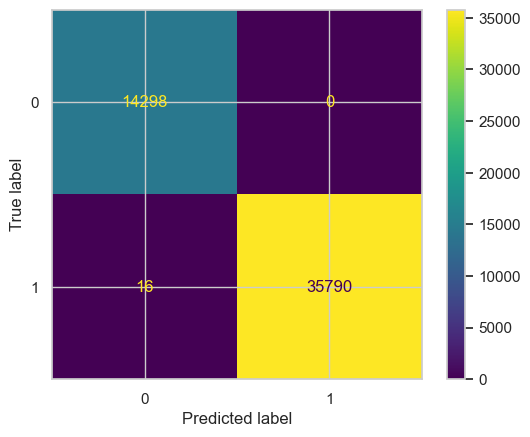

In [80]:
ConfusionMatrixDisplay.from_predictions(smoke_train_label,y_pred_main_classes)

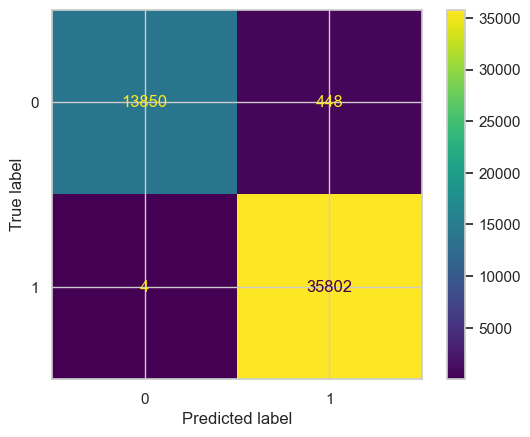

In [81]:
ConfusionMatrixDisplay.from_predictions(smoke_train_label,y_pred_aux_classes)

>>### The graph below shows the difference between the Sequential and Functional APIs , we can see that they are close to each other

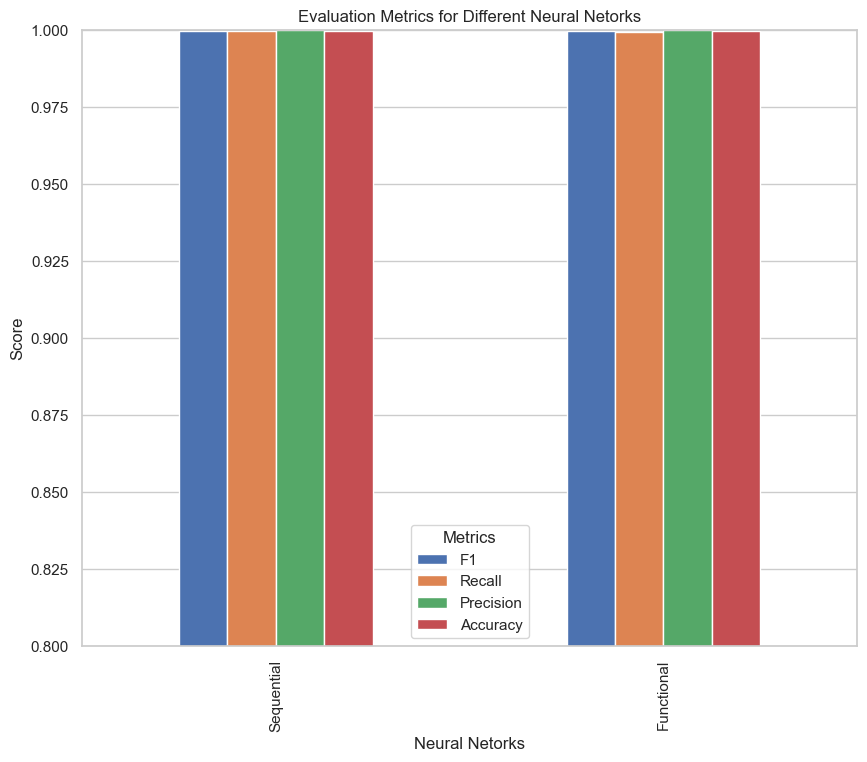

In [82]:
data = {
    'Sequential': [seq_f, seq_r, seq_p, seq_a],
    'Functional': [main_f1, main_recall, main_precision, main_acc]
}

# Create the DataFrame with classifiers as rows
df = pd.DataFrame(data, index=['F1', 'Recall', 'Precision', 'Accuracy'])

df = df.transpose()

# Plot the bar plot
df.plot(kind='bar', figsize=(10, 8))
plt.title('Evaluation Metrics for Different Neural Netorks')
plt.xlabel('Neural Netorks')
plt.ylabel('Score')
plt.legend(title='Metrics')
plt.ylim(0.8,1)
plt.show()

>> # In this part we chose to train a neural network using keras Tuner.

In [83]:
tf.keras.backend.clear_session()
def call_existing_code(units, activation, dropout, lr,kernel_initializer):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=units, activation=activation, kernel_initializer= kernel_initializer, name = 'Input', input_shape=(14,)))
    if dropout:
        model.add(keras.layers.Dropout(rate=0.5))
    model.add(keras.layers.Dense(units=units, activation=activation, kernel_initializer=  kernel_initializer, name = 'Hidden_1'))
    if dropout:
        model.add(keras.layers.Dropout(rate=0.5))
    model.add(keras.layers.Dense(units=units, activation=activation, kernel_initializer=  kernel_initializer, name = 'Hidden_2'))
    model.add(keras.layers.Dense(units=1,activation="sigmoid",kernel_initializer=  "GlorotUniform", name ='Output'))
    model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])
    return model

def build_model(hp):
    units = hp.Int("units", min_value=32, max_value=512, step=32)
    activation = hp.Choice("activation", ["relu", "tanh","sigmoid"])
    dropout = hp.Boolean("dropout")
    kernel_initializer =  hp.Choice("kernel_initializer", ["he_normal", "GlorotUniform"])
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # call existing model-building code with the hyperparameter values.
    model = call_existing_code(
        units=units, activation=activation, dropout=dropout, lr=lr,kernel_initializer = kernel_initializer
    )
    return model

In [84]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
)

In [85]:
tuner.search(smoke_test, smoke_test_label, epochs=100 ,validation_split=0.2 ,callbacks=[EarlyStopping('val_loss',patience=10),ModelCheckpoint("my_checkpoints",save_best_only=True)],use_multiprocessing=True)

Trial 3 Complete [00h 01m 03s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 03m 28s


In [86]:
best_model = tuner.get_best_models()[0]

In [87]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 224)               3360      
                                                                 
 Hidden_1 (Dense)            (None, 224)               50400     
                                                                 
 Hidden_2 (Dense)            (None, 224)               50400     
                                                                 
 Output (Dense)              (None, 1)                 225       
                                                                 
Total params: 104385 (407.75 KB)
Trainable params: 104385 (407.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
best_model.evaluate(smoke_train, smoke_train_label)

1566/1566 [==============================] - 2s 961us/step - loss: 0.0056 - accuracy: 0.9990


[0.005610283929854631, 0.9990020990371704]

In [89]:
y_pred_final = best_model.predict(smoke_train)
y_pred_final_classes = (y_pred_final > 0.5).astype(int)

1566/1566 [==============================] - 2s 1ms/step


> # The below confusion matrix for the train data 

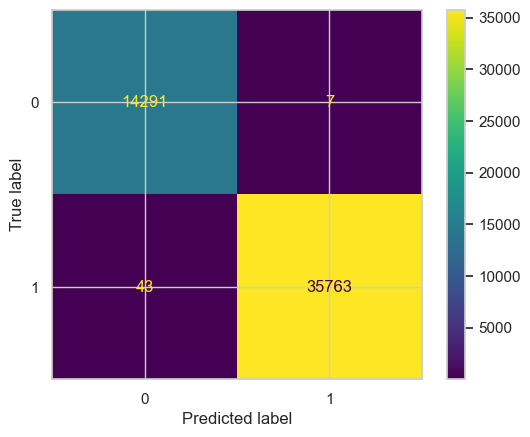

In [90]:
ConfusionMatrixDisplay.from_predictions(smoke_train_label,y_pred_final_classes)

In [91]:
final_acc= accuracy_score(smoke_train_label,y_pred_final_classes) 
print("Accuracy : ",final_acc)
final_per= precision_score(smoke_train_label,y_pred_final_classes)
print("Precision: ",final_per)
final_rec= recall_score(smoke_train_label,y_pred_final_classes) 
print("Recall: ",final_rec)
final_f1= f1_score(smoke_train_label,y_pred_final_classes) 
print("F1 score: ", final_f1)

Accuracy :  0.9990020756825803
Precision:  0.9998043052837573
Recall:  0.9987990839524102
F1 score:  0.9993014418240751


In [92]:
y_pred_final_test = best_model.predict(smoke_test)
y_pred_final_test_classes = (y_pred_final_test > 0.5).astype(int)

  1/392 [..............................] - ETA: 8s392/392 [==============================] - 0s 924us/step


392/392 [==============================] - 0s 924us/step


> # The below confusion matrix for the test data 

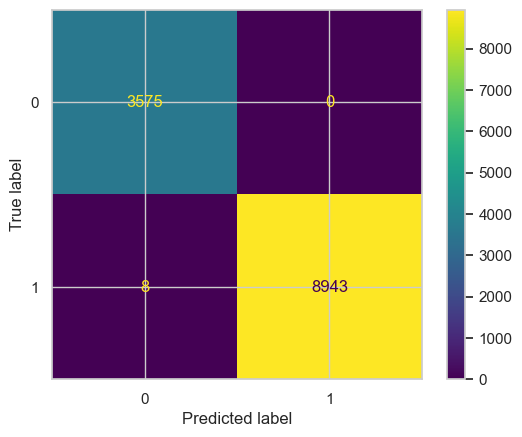

In [93]:
ConfusionMatrixDisplay.from_predictions(smoke_test_label,y_pred_final_test_classes)

In [94]:
final_acc= accuracy_score(smoke_test_label,y_pred_final_test_classes) 
print("Accuracy : ",final_acc)
final_per= precision_score(smoke_test_label,y_pred_final_test_classes)
print("Precision: ",final_per)
final_rec= recall_score(smoke_test_label,y_pred_final_test_classes) 
print("Recall: ",final_rec)
final_f1= f1_score(smoke_test_label,y_pred_final_test_classes) 
print("F1 score: ", final_f1)

Accuracy :  0.9993613284368513
Precision:  1.0
Recall:  0.999106245112278
F1 score:  0.9995529227674081


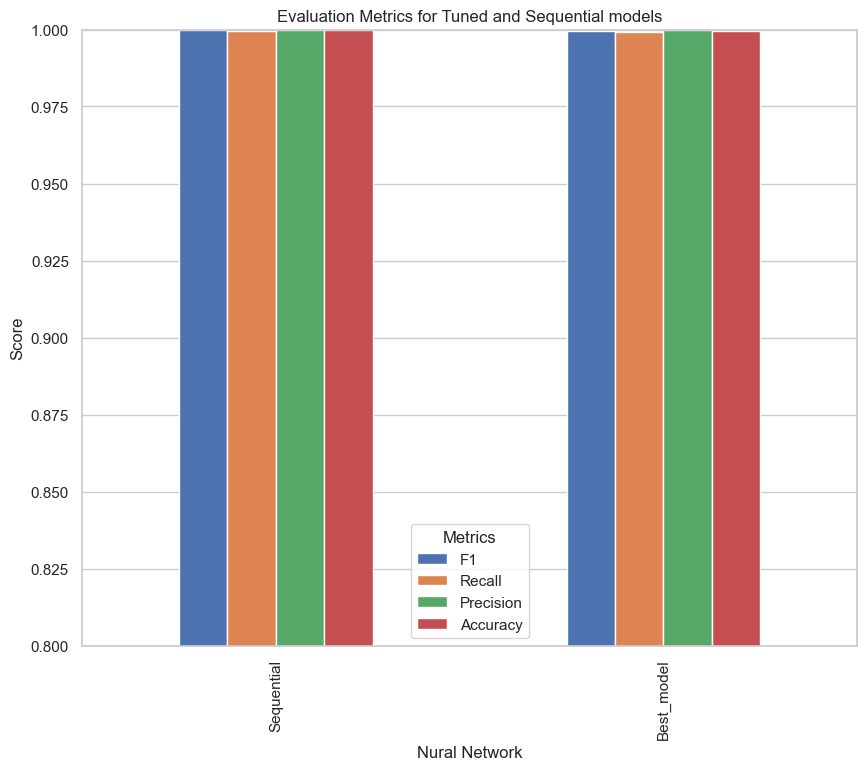

In [97]:
data = {
    'Sequential': [seq_f, seq_r, seq_p, seq_a],
    'Best_model': [final_f1, final_rec, final_per, final_acc]
}

# Create the DataFrame with classifiers as rows
df = pd.DataFrame(data, index=['F1', 'Recall', 'Precision', 'Accuracy'])

df = df.transpose()

# Plot the bar plot
df.plot(kind='bar', figsize=(10, 8))
plt.title('Evaluation Metrics for Tuned and Sequential models')
plt.xlabel('Nural Network')
plt.ylabel('Score')
plt.legend(title='Metrics')
plt.ylim(0.8,1)
plt.show()

### This plot represents a comparison between sequential neural network and the tuned model. 

### we can see that the tuned model and sequetial model has almost  the same accuracy.